# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Целью исследования является выявление зависимостей между стоимостью недвижимости и следующими параметрами:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

В рамках данного исследования предстоит решить следующие задачи:
  - осуществить предобработку данных (исключить или заменить пропуски насколько это возможно, обработать аномальные и редкие значения, обработать неявные дубликаты, изменить типы данных)
  - осуществить исследовательский анализ данных для выявления зависимостей
  - расчитать необходимые для этого показатели
  
В качестве исходных данных выступает архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Откроем датасет

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Основная информация о датафрейме `.head(10)`

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных, предоставленное заказчиком:**

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

##### Выводы по разделу

Наименования столбцов соответсвуют описанию, столбцы названы должным образом.

В столбце `first_day_exposition` не указано время размещения объявления, необходимо изменить формат

В данных имеются пропуски.

В целом, данных достаточно для проведения исследования, но в рекомендациях заказчику следует указать о добавлении дополнительных данных и модификации имеющихся.

**Модификация имеющихся данных:**
- ponds_around3000 — число водоёмов в радиусе 3 км, ponds_nearest — расстояние до ближайшего водоёма (м) => разделить на водоёмы и водотоки (реки)

**Добавление новых данных:**
**Картографические данные:**
- расстояние до ближайшего детского садика;
- расстояние до ближайшей школы;
- расстояние до ближайшего торгового центра;
- расстояние до ближайшей остановки метро (если метро отсутствует в населённом пункте, обозначить специальным образом);
- расстояние до ближайшей остановки другого общественного транспорта (автобус, трамвай, маршрутное такси);
- расстояние до ближайшей детской поликлинники;
- расстояние до ближайшей взрослой поликлинники;
- расстояние до ближайшего крупного университета;
- наличие в радиусе 15 км крупных производственных предприятий.

**Данные от пользователей:**
- оставляет ли собственник мебель и бытовую технику покупателю
- наличие мусоропровода;
- наличие лифта;
- наличие домофона;
- наличие консьержа;
- наличие закрытого двора.
- количество этажей в квартире/апартаментах

**Данные из реестра недвижимости:**
- Количество собственников;
- Имеются ли несовершеннолетние собственники;
- Возраст объекта недвижимости;
- Является ли объект недвижимости новостройкой или это вторичное жильё.

**Данные из других служб:**
- Имеется ли значительная задолженность по коммунальным платежам;
- Не арестовано ли имущество.

**Данные по объявлению**
- Объект недвижимости продаётся напрямую от собственника или от агенства недвижимости
- Количество фото во объявлении
- Наличие текстового описания в объявлении с количеством более 20-ти слов.

Дополнительные данные помогут выявить новые зависимости в исследовании, получить более точный результат.

По вопросам добавления новых данных следует дополнительно проконсультироваться с экспертами в сфере недвижимости.



#### Основная информация о датафрейме `.info()`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### Выводы по разделу
Общее количество строк: 23699

 0   total_images - формат соответсвует данным, пропусков не имеется
 
 1   last_price - формат соответсвует данным, пропусков не имеется
 
 2   total_area - формат соответсвует данным, пропусков не имеется
 
 3   first_day_exposition - **формат изменить в соответствии с выводами раздела 1.1.1, пропусков не имеется**
 
 4   rooms - формат соответсвует данным, пропусков не имеется
 
 5   ceiling_height - **формат соответствует данным, имеются пропуски**
 
 6   floors_total - **формат не соответствует данным, имеются пропуски (формат float, число этажей лучше перевести в int)**
 
 7   living_area - **формат соответствует данным, имеются пропуски**
 
 8   floor - формат соответсвует данным, пропусков не имеется
 
 9   is_apartment - **формат object, хотя, по смыслу тут должен быть bool (является ли объект недвижимости апартаментами?), также это указывал и заказчик в описании данных, очень много пропусков, необходимо уделить особое внимание данному столбцу**
 
 10  studio - формат соответсвует данным, пропусков не имеется
 
 11  open_plan - формат соответсвует данным, пропусков не имеется
 
 12  kitchen_area - **формат соответствует данным, имеются пропуски**
 
 13  balcony - **формат не соответствует данным, имеются пропуски (формат float, число балконов лучше перевести в int)**
 
 14  locality_name - **формат соответствует данным, имеются пропуски**
 
 15  airports_nearest - **формат соответствует данным, имеются пропуски**
 
 16  cityCenters_nearest - **формат соответствует данным, имеются пропуски**
 
 17  parks_around3000 - **формат не соответствует данным, имеются пропуски (формат float, число парков лучше перевести в int)**
 
 18  parks_nearest - **формат соответствует данным, имеются пропуски**
 
 19  ponds_around3000 - **формат не соответствует данным, имеются пропуски (формат float, число водоёмов лучше перевести в int)**
 
 20  ponds_nearest - **формат соответствует данным, имеются пропуски**
 
 21  days_exposition - **формат не соответствует данным, имеются пропуски (формат float, число дней лучше перевести в int)**

#### Основная информация о датафрейме `.describe()`

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


##### Выводы по разделу

В данном разделе изучены значения, где

**count**    # количество наблюдений в наборе данных

**mean**    # среднее арифметическое

**std**      # стандартное отклонение

**min**      # минимальное значение

**25%**      # первый квартиль

**50%**      # медиана, или второй квартиль

**75%**      # третий квартиль

**max**      # максимальное значение

Рассмотрим более подробно каждый из столбцов:

0 total_images - каких-либо аномальных значений не обнаружено, изображений в объявлении может и не быть, максимальное значение - 50 (но, вероятно, таких очень мало)

**1 last_price - максимальное значение `763 000 000`, такая стоимость возможна, минимальное значение `12190` выглядит странным, необходимо более подробное изучение**

2 total_area - каких-либо аномальных значений не обнаружено, объект недвижимости может иметь площадь `12` м^2, так и `900`, в остальном,медианное и среднее значения выглядят адекватными.

3 first_day_exposition - по умолчанию не обрабатывается методом `describe()`

**4 rooms - минимальное значение - 0, возможно, под значением 0 принимаются квартиры - студии, нужно проверить.**

**5 ceiling_height - минимальное значение - 1 м, максимальное значение - 100 м. Необходимо проверить значения этого столбца.**

6 floors_total - каких-либо аномальных значений не обнаружено

7 living_area - минимальное значение `2` м^2 выглядит странно, но с общей площадью объекта недвижимости `12` м^2 такое, в целом, возможно. 

8 floor - каких-либо аномальных значений не обнаружено

9 is_apartment - по умолчанию не обрабатывается методом `describe()`

10 studio - по умолчанию не обрабатывается методом `describe()`

11 open_plan - не обрабатывается методом `describe()`

12 kitchen_area - такая же ситуация как с `living_area`

13 balcony - каких-либо аномальных значений не обнаружено

14 locality_name - по умолчанию не обрабатывается методом `describe()`

**15 airports_nearest - каких-либо аномальных значений не обнаружено, минимальное значение - 0**

16 cityCenters_nearest - каких-либо аномальных значений не обнаружено

17 parks_around3000 - каких-либо аномальных значений не обнаружено

18 parks_nearest - каких-либо аномальных значений не обнаружено, минимальное значение 1 м, вероятно, означает, что объект недвижимости находится непосредственно в парковой зоне.

19 ponds_around3000 - каких-либо аномальных значений не обнаружено

20 ponds_nearest - каких-либо аномальных значений не обнаружено

21 days_exposition - каких-либо аномальных значений не обнаружено, максимальное значение 1580, но, вероятно, подобных значений очень мало.

#### Основная информация о датафрейме `.hist()`

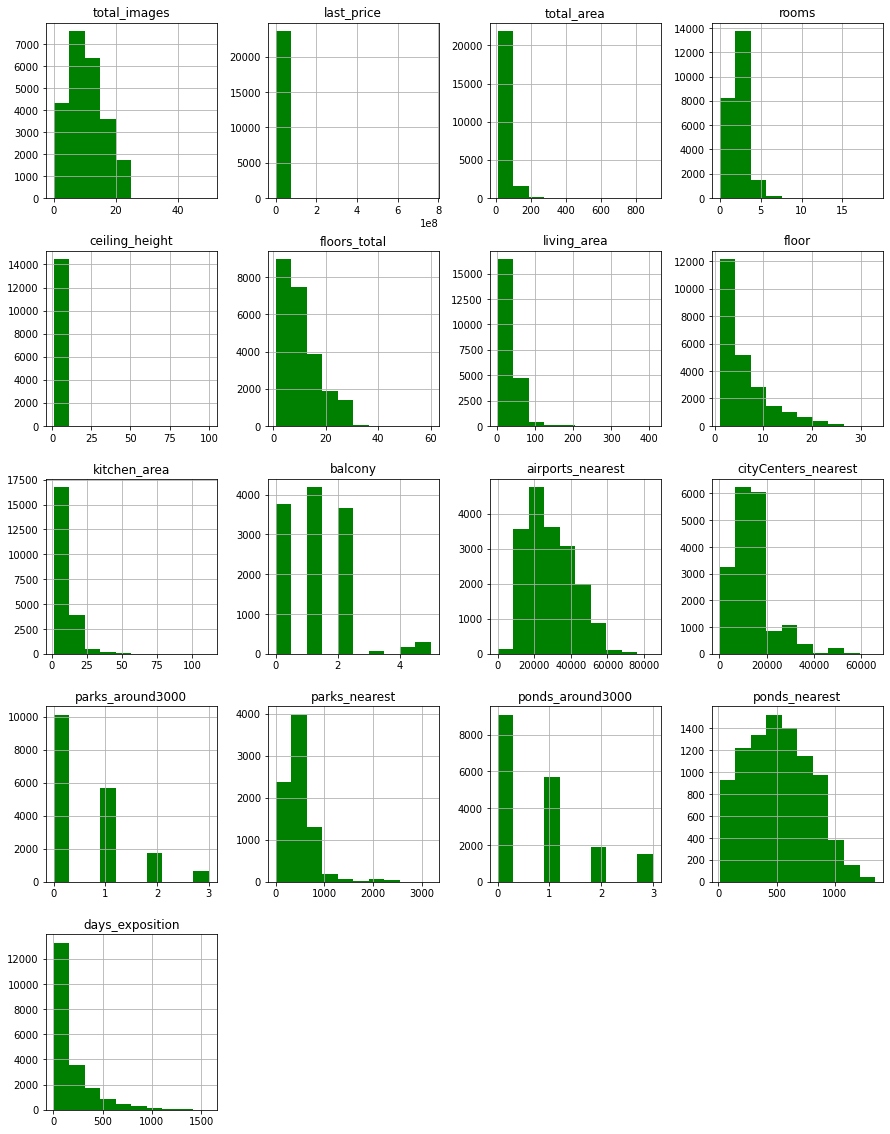

In [6]:
data.hist(color='green', figsize=(15, 20))
plt.show()

##### Выводы по разделу

Основные выводы по максимальным и минимальным значениям сделаны в разделе 1.3, но гистограммы помогают лучше понять распределение значений в общем. Они не очень информативные на данном этапе, но дают визуальное представление о данных.

Как видно, наибольшее искажение в распределения вносят объекты очень дорогие, с огромной площадью, с большой кухней и т.д. Возможно, такие объекты лучше совсем исключить из исследования, т.к. цена на них определяется совершенно по другой методике. Необходимо также определить, сколько всего таких дорогих объектов в выборке, вероятно, их очень мало, исключить их из выборки при необходимости.

### Выводы по главе 1

Было осуществлено предварительное ознакомление с данными.

Необходимо дать рекомендации по дополнению данных заказчику в соответствии с выводами раздела 1.1.1

Выявлены некоторые проблемы с данными: пропуски, неверный формат данных, аномальные значения

Построим предварительный план по предобработке данных.

1) Устранение пропусков значений в следующих столбцах:
 
- `5 ceiling_height`
 
- `6 floors_total` 
 
- `7 living_area`
 
- `9 is_apartment`
  
- `12 kitchen_area`
 
- `13 balcony` 
 
- `14 locality_name`
 
- `15 airports_nearest`
 
- `16 cityCenters_nearest`
 
- `17 parks_around3000`
 
- `18 parks_nearest` 
 
- `19 ponds_around3000` 
 
- `20 ponds_nearest` 
 
- `21 days_exposition` 
 
2) Изменение формата данных в следующих столбцах:

- `3 first_day_exposition` - **формат изменить в соответствии с выводами раздела 1.1.1: "время не указано, убрать"**
 
- `6 floors_total` - **формат float, число этажей лучше перевести в int**

- `9 is_apartment` - **формат object, хотя, по смыслу тут должен быть bool (является ли объект недвижимости апартаментами?), также это указывал и заказчик в описании данных**
 
- `13 balcony` - **формат float, число балконов лучше перевести в int**
 
- `17 parks_around3000` - **формат float, число парков лучше перевести в int**

- `19 ponds_around3000` - **формат float, число водоёмов лучше перевести в int**
 
- `21 days_exposition` - **формат float, число дней лучше перевести в int**
 
3) Устранить дубликаты

4) Аномальные значения следует устранить в процессе проведения исследования, так как на этапе предобработки данных не совсем понятно, какие из значений могут быть важными

### Предобработка данных

#### Обработка пропусков

##### Выявление пропусков

В рамках работы по предобработке данных проверим наличие пропусков и примем решение об удалении таких строк, либо о заполнении значениями

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Найдем долю пропусков, %

In [8]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('YlOrRd').format('{:.2f}')

,0
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


###### Выводы по разделу

Во многих столбцах имеются пропуски, их необходимо обработать с учётом особенностей данных

##### Обработка пропусков в столбце `ceiling_height`
Пропусков в данном столбце очень много, исключение таких строк значительно повлияет на результаты.
Высота потолка регламентируется СНиП 31-01-2003 "Здания жилые многоквартирные":
5.8 Высота (от пола до потолка) жилых помещений и кухни (кухни-столовой) в климатических районах IА, IБ, IГ, IД и IVA должна быть не менее 2,7 м, а в других климатических районах - не менее 2,5 м.
Медианное значение 2.65 м, но в реальности такое значение вряд ли будет, поэтому примем 2.6 м
В некоторых домах потолки будут выше, но тогда необходимы данные по каждому дому. 
Проводить зависимости высоты потолка от этажности дома, площади, количества комнат и т.д. не совсем корректно.

In [9]:
data['ceiling_height'].fillna(value=2.6, inplace=True) 

###### Выводы по разделу

Пропуски столбца `ceiling_height` были заполнены значением 2.6 (м)

##### Обработка пропусков в столбце `floors_total`

Пропущенных значений всего 86, заполнять их средним или медианным значением не совсем корректно, поэтому лучше избавимся от таких строк.

In [10]:
data.dropna(subset=['floors_total'], inplace=True) 

###### Выводы по разделу

Строки с пропусками столбца `floors_total` были исключены из датафрейма

##### Обработка пропусков в столбце `living_area`

Заполнять пропуски в данном столбце медианным или средним значением некорректно, так как жилая площадь должна соотноситься с общей площадью `total_area`. Таким образом, необходимо провести вычисление отношения жилой площади к общей площади, вычислить медианное значение. 

In [11]:
#введем новую переменную, в которой сохраним медианное значение отношения жилой площади к общей
liv_tot_area_calc_median = (data['living_area'] / data['total_area']).median()
liv_tot_area_calc_median

0.5681818181818182

Столбец `total_area` изначально не имеет пропусков, поэтому для вычисления пропущенных значений в столбце нам необходимо просто умножить новую переменную `liv_tot_area_calc_mean` на столбец `total_area` в пропущенных значениях

In [12]:
data['living_area'].fillna(liv_tot_area_calc_median * data['total_area'], inplace=True)

###### Выводы по разделу

Строки с пропусками столбца `living_area` были заполнены специальным образом: по среднему соотношению жилой площади к общей площади

##### Обработка пропусков в столбце `is_apartment`

Столбец имеет критическое множество пропусков, необходимо определиться, стоит ли вообще его использовать в исследовании.

In [13]:
data.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

Как видно, в столбце всего `50` значений `True`. Этого слишком мало для исследования. Поэтому заменим все пропущенные значения столбца на `False`

In [14]:
data['is_apartment'].fillna(False, inplace=True)

###### Выводы по разделу

Так как значений `True` столбца `is_apartment` слишком мало, все пропуски были заменены на `False`. Для исследования эти данные не подходят

##### Обработка пропусков в столбце `kitchen_area`

Обработаем столбец по аналогии с `living_area`

In [15]:
#введем новую переменную, в которой сохраним медианное значение отношения площади кухни к общей
kitchen_tot_area_calc_median = (data['kitchen_area'] / data['total_area']).median()
kitchen_tot_area_calc_median

0.1723476871686878

In [16]:
data['kitchen_area'].fillna(kitchen_tot_area_calc_median * data['total_area'], inplace=True)

###### Выводы по разделу

Строки с пропусками столбца `kitchen_area` были заполнены специальным образом: по среднему соотношению жилой площади к общей площади

##### Обработка пропусков в столбце `balcony`

Сгруппируем и посчитаем
строки по количеству балконов.

In [17]:
data.groupby('balcony')['balcony'].count()

balcony
0.0    3713
1.0    4195
2.0    3657
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

Далеко не в каждой квартире есть балкон, обычно это небольшая лоджия. Как видно из вышеуказанных значений количество квартир со значением меньше, чем со значением `1`. Поэтому вполне вероятно, что пользователи просто не указывали ничего, если балкона у их объекта нет. Присвоим всем пропускам значение `0`

In [18]:
data['balcony'].fillna(0, inplace=True)

###### Выводы по разделу

Строки столбца `balcony` были заполнены значениями 0, так как, вероятнее всего, пользователи не указывали ничего, если у них нет балкона

##### Обработка пропусков в столбце `locality_name`

Пропущенных значений всего 49, вероятно, пользователи просто не указали место нахождения их объекта недвижимости. Поэтому такие строки можно просто удалить.

In [19]:
data.dropna(subset=['locality_name'], inplace=True) 

###### Выводы по разделу

Пропущенных строк `locality_name` всего 49, поэтому они были удалены. На результаты повлияет незначительно

##### Обработка пропусков в столбце `airports_nearest`

Неизвестно, чем были вызваны пропуски в столбце `airports_nearest`. Мы не можем заполнить данные, т.к. это может исказить результаты исследования

###### Выводы по разделу

Значения столбца `airports_nearest` не были заполнены, так неизвестны причины пропуска, заполнить их средним или медианным значением будет некорректно

##### Обработка пропусков в столбце `cityCenters_nearest`

Сложно сказать, чем вызваны пропуски в данном столбце, возможно, в населенном пункте нет как такового центра города либо он находится слишком далеко, поэтому не было присвоено какое-либо значение. Так как неизвестна причина пропуска, а заполнить их проблематично, не будем их модифицировать

###### Выводы по разделу

Пропуски столбца `cityCenters_nearest` не были заполнены так как неизвестна причина пропуска

##### Обработка пропусков в столбце `parks_around3000`

Минимальное значение данного столбца - `0`, это означает, что парка поблизости нет, пропуски, вероятно, означают то же самое. Заполним пропуски значением `0`

In [20]:
data['parks_around3000'].fillna(0, inplace=True)

###### Выводы по разделу

Пропуски столбца `parks_around3000` были заполнены значением `0`, так как, вероятно, пропуски также означают, что парка поблизости нет

##### Обработка пропусков в столбце `parks_nearest`

Пропусков в данном столбце гораздо больше, чем в столбце `parks_around3000`, чем они вызваны - неизвестно. Заполнение может привести к неверным результатам

###### Выводы по разделу

Пропуски столбца `parks_nearest` не были заполнены или удалены, так как неизвестна причина их появления. Заполнение может вызвать неверные результаты

##### Обработка пропусков в столбце `ponds_around3000`

Минимальное значение данного столбца - `0`, вероятно, это означает, что водоёма поблизости нет, пропуски означают то же самое. Заполним пропуски значением `0`

In [21]:
data['ponds_around3000'].fillna(0, inplace=True)

###### Выводы по разделу

Пропуски столбца `ponds_around3000` были заполнены значением `0`, так как, вероятно, пропуски также означают, что водоёма поблизости нет

##### Обработка пропусков в столбце `ponds_nearest`

Пропусков в данном столбце гораздо больше, чем в столбце `ponds_around3000`, чем они вызваны - неизвестно. Заполнение может привести к неверным результатам

###### Выводы по разделу

Пропуски столбца `ponds_nearest` были заполнены значением `0`, так как, вероятно, пропуски также означают, что парка поблизости нет

##### Обработка пропусков в столбце `days_exposition`

Пропуски в столбце `days_exposition`, вероятно, означают, что объект так и не был продан (на время сбора данных), но заполнение данного столбца вызовет лишь трудности при подсчете, поэтому оставим как есть

###### Выводы по разделу

Значениям столбца `days_exposition` оставляем как есть, так как заполнять эти данные медианным или средним значением некорректно и их слишком много, чтобы удалить такие строки.

Проверим, насколько удалось избавиться от пропусков данных

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Выводы по обработке пропусков 

**Планировалось устранить пропуски в следующих столбцах:**
 
- `5 ceiling_height`
 
- `6 floors_total` 
 
- `7 living_area`
 
- `9 is_apartment`
  
- `12 kitchen_area`
 
- `13 balcony` 
 
- `14 locality_name`
 
- `15 airports_nearest`
 
- `16 cityCenters_nearest`
 
- `17 parks_around3000`
 
- `18 parks_nearest` 
 
- `19 ponds_around3000` 
 
- `20 ponds_nearest` 
  

**Фактически проделанная работа по пропускам:**

- Пропуски столбца ceiling_height были заполнены значением 2.6 (м)

- Строки с пропусками столбца floors_total были исключены из датафрейма

- Строки с пропусками столбца living_area были заполнены специальным образом: по среднему соотношению жилой площади к общей площади

- Так как значений True столбца is_apartment слишком мало, все пропуски были заменены на False. Для исследования эти данные не подходят

- Строки с пропусками столбца kitchen_area были заполнены специальным образом: по среднему соотношению жилой площади к общей площади

- Строки столбца balcony были заполнены значениями 0, так как, вероятнее всего, пользователи не указывали ничего, если у них нет балкона

- Пропущенных строк locality_name всего 49, поэтому они были удалены. На результаты повлияет незначительно

- Пропуски столбца cityCenters_nearest не были заполнены так как неизвестна причина пропуска

- Пропуски столбца parks_around3000 были заполнены значением 0, так как, вероятно, пропуски также означают, что парка поблизости нет

- Пропуски столбца parks_nearest не были заполнены или удалены, так как неизвестна причина их появления. Заполнение может вызвать неверные результаты

- Пропуски столбца ponds_around3000 были заполнены значением 0, так как, вероятно, пропуски также означают, что водоёма поблизости нет

- Пропуски столбца ponds_nearest были заполнены значением 0, так как, вероятно, пропуски также означают, что парка поблизости нет

**Не удалось устранить пропуски в следующих столбцах:**

- cityCenters_nearest      5501
- parks_nearest           15535
- ponds_nearest           14529
- airports_nearest         5524
- days_exposition          3171

#### Изменение типа данных

Изменим типы данных в соответствии с выводами главы 1:

- `3 first_day_exposition` - **формат изменить в соответствии с выводами раздела 1.1.1: "время не указано, убрать"**
 
- `6 floors_total` - **формат float, число этажей лучше перевести в int**

- `9 is_apartment` - **формат object, хотя, по смыслу тут должен быть bool (является ли объект недвижимости апартаментами?), также это указывал и заказчик в описании данных**
 
- `13 balcony` - **формат float, число балконов лучше перевести в int**
 
- `17 parks_around3000` - **формат float, число парков лучше перевести в int**

- `19 ponds_around3000` - **формат float, число водоёмов лучше перевести в int**
 
- `21 days_exposition` - **формат float, число дней лучше перевести в int**

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [24]:
data.astype(
    {'floors_total': 'int', 
     'is_apartment': 'bool',
     'balcony': 'int',
     'parks_around3000': 'int',
     'ponds_around3000': 'int',
     'days_exposition': 'int'}, errors='ignore').dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Выводы по изменению типов данных

Были изменены типы данных:

- `3 first_day_exposition` - **изменен формат даты, убрано время
 
- `6 floors_total` - **преобразовано в `int`**

- `9 is_apartment` - **преобразовано в bool**
 
- `13 balcony` - **преобразовано в `int`**
 
- `17 parks_around3000` - **преобразовано в `int`**

- `19 ponds_around3000` - **преобразовано в `int`**
 
- `21 days_exposition` - **преобразовано в `int`**

#### Устранение неявных дубликатов

In [25]:
#выявляем неявные дубликаты в столбце locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
data = data.apply(lambda x: x.replace({'поселок':'посёлок',
                                       'городской посёлок': 'посёлок',
                                       'посёлок городского типа': 'посёлок',
                                       'коттеджный посёлок': 'посёлок',
                                       'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

len(data.locality_name.unique())

333

#### Выводы по устранению неявных дубликатов

Были заменены дубликаты:
- 'поселок':'посёлок';
- 'городской посёлок': 'посёлок';
- 'посёлок городского типа': 'посёлок';
- 'коттеджный посёлок': 'посёлок';
- 'посёлок при железнодорожной станции': 'посёлок станции'.

#### Устранение явных дубликатов

In [27]:
data.duplicated().sum()

0

#### Выводы по устранению явных дубликатов

Явных дубликатов не обнаружено

### Выводы по главе 3

Была осуществлена предобработка данных. 

**Были изменены форматы данных:** 

3 first_day_exposition - **изменен формат даты, убрано время

6 floors_total - преобразовано в int

9 is_apartment - преобразовано в bool

13 balcony - преобразовано в int

17 parks_around3000 - преобразовано в int

19 ponds_around3000 - преобразовано в int

21 days_exposition - преобразовано в int

**Фактически проделанная работа по пропускам:**

- Пропуски столбца ceiling_height были заполнены значением 2.6 (м)

- Строки с пропусками столбца floors_total были исключены из датафрейма

- Строки с пропусками столбца living_area были заполнены специальным образом: по среднему соотношению жилой площади к общей площади

- Так как значений True столбца is_apartment слишком мало, все пропуски были заменены на False. Для исследования эти данные не подходят

- Строки с пропусками столбца kitchen_area были заполнены специальным образом: по среднему соотношению жилой площади к общей площади

- Строки столбца balcony были заполнены значениями 0, так как, вероятнее всего, пользователи не указывали ничего, если у них нет балкона

- Пропущенных строк locality_name всего 49, поэтому они были удалены. На результаты повлияет незначительно

- Пропуски столбца cityCenters_nearest не были заполнены так как неизвестна причина пропуска

- Пропуски столбца parks_around3000 были заполнены значением 0, так как, вероятно, пропуски также означают, что парка поблизости нет

- Пропуски столбца parks_nearest не были заполнены или удалены, так как неизвестна причина их появления. Заполнение может вызвать неверные результаты

- Пропуски столбца ponds_around3000 были заполнены значением 0, так как, вероятно, пропуски также означают, что водоёма поблизости нет

- Пропуски столбца ponds_nearest были заполнены значением 0, так как, вероятно, пропуски также означают, что парка поблизости нет

- Значениям столбца days_exposition было присвоено 0, так как, вероятно, такие объекты ещё не были проданы во время сбора данных

**Не удалось устранить пропуски в следующих столбцах:**

- cityCenters_nearest      5501
- parks_nearest           15535
- ponds_nearest           14529
- airports_nearest         5524

**Были заменены неявные дубликаты:**

- 'поселок':'посёлок';
- 'городской посёлок': 'посёлок';
- 'посёлок городского типа': 'посёлок';
- 'коттеджный посёлок': 'посёлок';
- 'посёлок при железнодорожной станции': 'посёлок станции'.

**Явных дубликатов не обнаружено**

### Посчитайте и добавьте в таблицу новые столбцы

Посчитать и добавить в таблицу: 

- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города


#### Цена одного квадратного метра

In [28]:
#расчитаем цену квадратного метра и выведем первые 5 строк нового столбца
data['sq_m_price'] = round(data['last_price'] / data['total_area'], 0)
data['sq_m_price'].head()

0    120370.0
1     82921.0
2     92786.0
3    408176.0
4    100000.0
Name: sq_m_price, dtype: float64

#### День публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [29]:
#создадим новый столбец со днями недели и выведем первые 5 строк нового столбца
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['weekday_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64

#### Месяц публикации объявления

In [30]:
#создадим новый столбец с месяцем размещения и выведем первые 5 строк нового столбца
data['month_exposition'] = data['first_day_exposition'].dt.month 
data['month_exposition'].head()

0     3
1    12
2     8
3     7
4     6
Name: month_exposition, dtype: int64

#### Год публикации объявления

In [31]:
#создадим новый столбец с годом размещения и выведем первые 5 строк нового столбца
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64

#### Тип этажа квартиры (значения — «первый», «последний», «другой»)
Для исследования условно присвоим категории: 1(первый), 2(последний) и 3(другой)

In [32]:
data['floor_type'] = np.where(data['floor'] == 1, 1, 3)
data['floor_type'] = np.where(data['floor'] == data['floors_total'], 2, data['floor_type'])
data['floor_type'].head(10)

0    3
1    1
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: floor_type, dtype: int64

Проверяем результат

In [33]:
data['floor'].head(10)

0     8
1     1
2     4
3     9
4    13
5     5
6     6
7    22
8    26
9     7
Name: floor, dtype: int64

#### Расстояние в км до центра города

In [34]:
#переводим единицы измерения из м в км, с округлением
data['cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000, 0)
data['cityCenters_nearest'].head(10)

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
5     NaN
6    19.0
7    12.0
8     NaN
9    15.0
Name: cityCenters_nearest, dtype: float64

### Выводы по главе 5

Были добавлены новые столбцы:

- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

### Проведите исследовательский анализ данных

В рамках данной главы мы изучим следующие параметры:

  1. Общая площадь;
  2. Жилая площадь;
  3. Площадь кухни;
  4. Цена объекта;
  5. Количество комнат;
  6. Высота потолков;
  7. Этаж квартиры;
  8. Тип этажа квартиры («первый», «последний», «другой»);
  9. Общее количество этажей в доме;
  10. Расстояние до центра города в метрах;
  11. Расстояние до ближайшего аэропорта;
  12. Расстояние до ближайшего парка;
  13. День и месяц публикации объявления
  
Для каждого параметра должны быть построены гистограммы.
Также в данном главе будут выявляться аномальные значения, их влияние на данные и преобразование данных.

Для выполнения данной задачи разработаем функцию.

In [35]:
#ограничим стоимость объектов недвижимости
min_apart_price = 50000
max_apart_price = 12000000

In [36]:

def analyze (column, name, x, y):
    
    #Функция преобразует данные: ограничивает стоимость объекта в соответствии с указанным
    #в переменной max_apart_price
    #Выводит гистограммы, диаграмму размаха, графики зависимости, расчитывает коэффициент корреляции
    #а также убираем некоторые аномальные и редкие значения при помощи .query():
    #минимальную и максимальную стоимость объекта
    #минимальную и максимальную высоту потолка
    
    #Ограничим максимальную и минимальную стоимость квартиры
    data_good = data.query('(last_price <= @max_apart_price) and (last_price >= @min_apart_price)')
    #Ограничим высоту потолка 4 м
    data_good = data_good.query('(ceiling_height <= 3.75) and (ceiling_height >= 2.3)')  
    #В рамках исследования, будем учитывать расстояние до аэропорта > 0
    #data_good = data_good.query('(airports_nearest > 0)')
    data_good = data_good.query('(rooms < 6) and (rooms > 0)')
    #ограничим жилую площадь
    data_good = data_good.query('(total_area < 150) and (total_area > 10)')
    #ограничим площадь кухни
    data_good = data_good.query('(kitchen_area < 40)')
    #ограничим количество этажей
    data_good = data_good.query('(floors_total < 40)')
    
    #выведем гистограмму
    print('Гистограмма')
    data_good.plot(
        y = column,
        kind = 'hist',
        bins = 200,
        grid=True,
        alpha=.5,
        color='DarkCyan',
        ec='LightSeaGreen',
        label = name,
        figsize = (7,3),
        range = (0,data_good[column].max()))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    #Построим диаграмму размаха
    plt.boxplot(data_good[column]) 
    plt.title(name)
    plt.xlabel(x)
    plt.ylim(data_good[column].min(), data_good[column].max()) 
    plt.show()
    
    #График зависимости стоимости квадратного метра от значения column
    print('График зависимости за квадратный метр от', x)
    data_good.plot(
        x=column,
        y='sq_m_price',
        kind='scatter',
        grid=True, 
        alpha=0.6,
        color='MediumAquamarine')
    plt.xlabel(x)
    plt.ylabel('Стоимость квадратного метра')
    plt.show()
    
    #для анализа стоимости объекта не используется
    if column != 'last_price':
    #График зависимости общей стоимости от значения column
    #Данный график построен другим способом, при помощи pivot_table
        print('График зависимости общей стоимости объекта от', x)
        data_good.pivot_table(index=column, values='last_price').plot(
            grid=True, 
            style='x', 
            figsize=(5, 5),
            alpha=0.85,
            color='MediumSlateBlue'
            )
        plt.xlabel(x)
        plt.ylabel('Стоимость объекта')
        plt.show()
    
    #Описание данных в столбце
    print('Общее описание данных в столбце')
    print(data_good[column].describe())
    
    print('\nКоэффициент корреляции квадратного метра')
    print(data_good['sq_m_price'].corr(data_good[column]))
    print('\nКоэффициент корреляции общей стоимости объекта')
    print(data_good['last_price'].corr(data_good[column]))


#### Общая площадь

Гистограмма


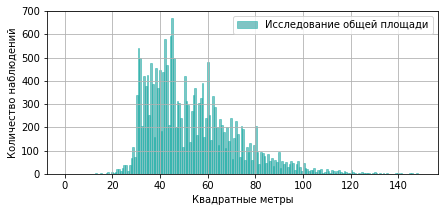

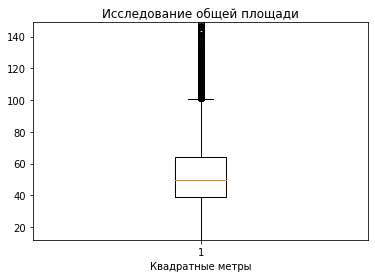

График зависимости за квадратный метр от Квадратные метры


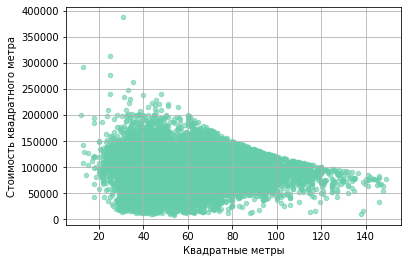

График зависимости общей стоимости объекта от Квадратные метры


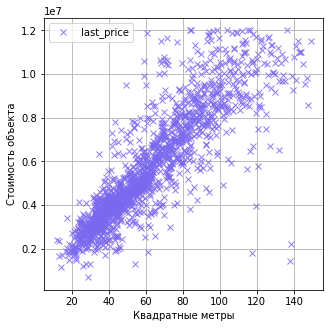

Общее описание данных в столбце
count    21285.000000
mean        53.482666
std         18.759773
min         12.000000
25%         39.200000
50%         49.900000
75%         64.000000
max        149.000000
Name: total_area, dtype: float64

Коэффициент корреляции квадратного метра
-0.0743217645721607

Коэффициент корреляции общей стоимости объекта
0.7030333964276544


In [37]:
analyze('total_area','Исследование общей площади', 'Квадратные метры', 'Количество наблюдений')

##### Выводы по разделу

В основном, объекты имеют площадь от 25 до 80 квадратных метров. 
Как видно, чем больше общая площадь, тем выше стоимость, что логично.
Если смотреть на стоимость за квадратный метр, то ситуация противоположная - чем больше общая площадь, тем меньше придётся заплатить за квадратный метр.

#### Жилая площадь

Гистограмма


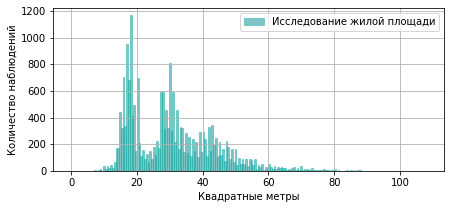

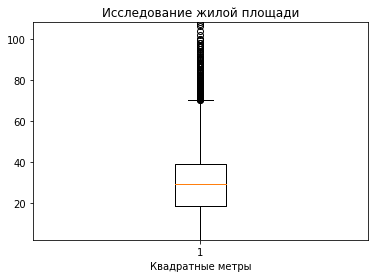

График зависимости за квадратный метр от Квадратные метры


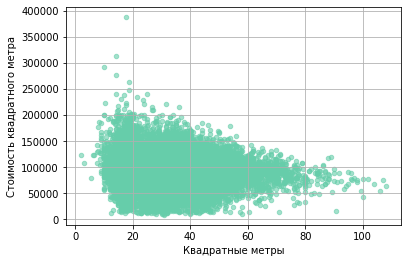

График зависимости общей стоимости объекта от Квадратные метры


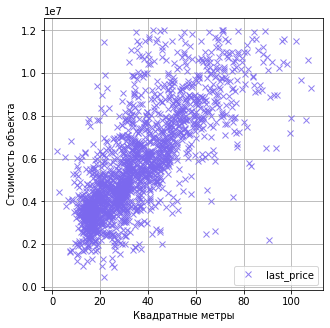

Общее описание данных в столбце
count    21285.00000
mean        30.63208
std         13.21502
min          2.00000
25%         18.50000
50%         29.20000
75%         39.10000
max        108.00000
Name: living_area, dtype: float64

Коэффициент корреляции квадратного метра
-0.15385677664615982

Коэффициент корреляции общей стоимости объекта
0.5848843461886123


In [38]:
analyze('living_area','Исследование жилой площади', 'Квадратные метры', 'Количество наблюдений')

##### Выводы по разделу

Ситуация аналогична исследованию по общей площади

#### Площадь кухни

Гистограмма


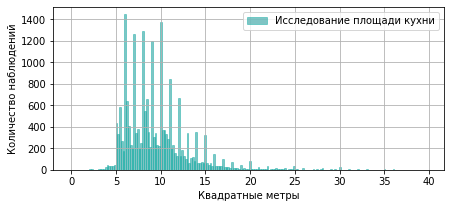

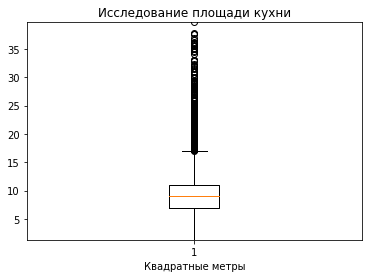

График зависимости за квадратный метр от Квадратные метры


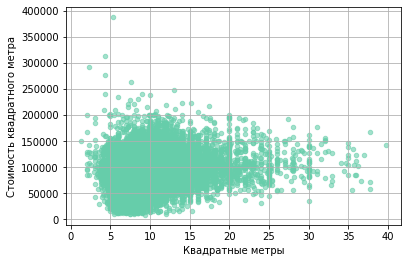

График зависимости общей стоимости объекта от Квадратные метры


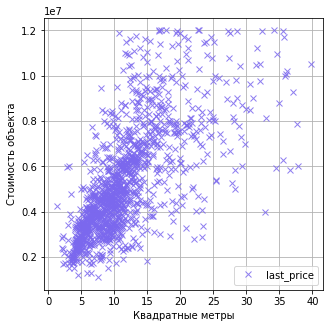

Общее описание данных в столбце
count    21285.000000
mean         9.529449
std          3.732292
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         39.700000
Name: kitchen_area, dtype: float64

Коэффициент корреляции квадратного метра
0.20268387210257802

Коэффициент корреляции общей стоимости объекта
0.5140258221995399


In [39]:
analyze('kitchen_area','Исследование площади кухни', 'Квадратные метры', 'Количество наблюдений')

##### Выводы по разделу

В основном, кухни имеют площадь от 5 до 15 квадратных метров, что соответствует реальности. 

По распределению видно, что ситуация аналогична исследованию общей площади, но коэффициент Пирсона говорит о том, что площадь кухни слабо влияет на стоимость за квадратный метр, но влияет на общую стоимость.

#### Цена объекта

Гистограмма


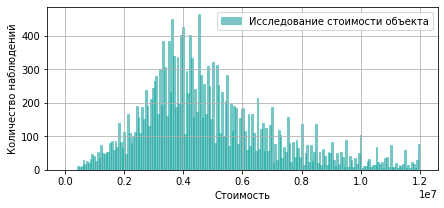

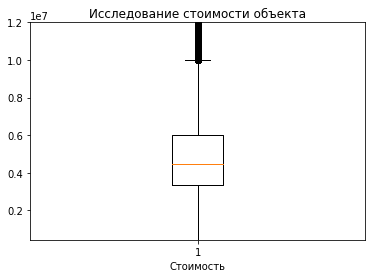

График зависимости за квадратный метр от Стоимость


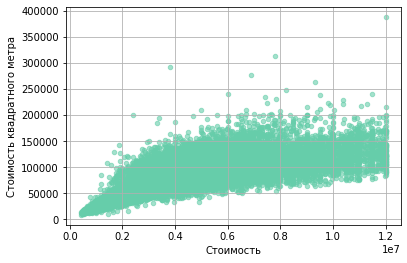

Общее описание данных в столбце
count    2.128500e+04
mean     4.876907e+06
std      2.254305e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.450000e+06
75%      6.000000e+06
max      1.200000e+07
Name: last_price, dtype: float64

Коэффициент корреляции квадратного метра
0.6216925063039852

Коэффициент корреляции общей стоимости объекта
1.0


In [40]:
analyze('last_price','Исследование стоимости объекта', 'Стоимость', 'Количество наблюдений')

##### Выводы по разделу

В рамках исследования учитываем стоимость квартир от 50000 до 8 миллионов, как видно, в основном, стоимость объектов составляет от 3.5 до 5 миллионов, с пиком на 4.5 миллионах, далее количество объявлений идёт на спад.

Отмечается также, что общая стоимость влияет на стоимость квадратного метра.

#### Количество комнат

Гистограмма


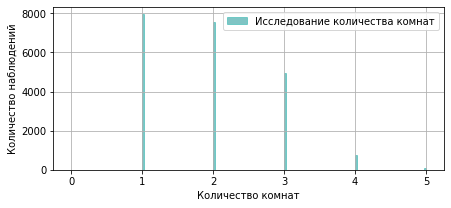

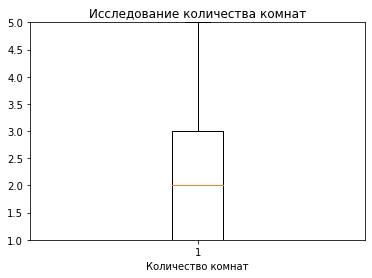

График зависимости за квадратный метр от Количество комнат


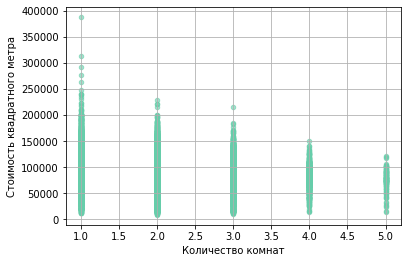

График зависимости общей стоимости объекта от Количество комнат


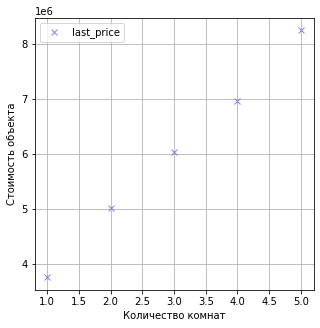

Общее описание данных в столбце
count    21285.00000
mean         1.94630
std          0.89012
min          1.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          5.00000
Name: rooms, dtype: float64

Коэффициент корреляции квадратного метра
-0.22524910982277335

Коэффициент корреляции общей стоимости объекта
0.44440099872342775


In [41]:
analyze('rooms', 'Исследование количества комнат', 'Количество комнат', 'Количество наблюдений')

##### Выводы по разделу

В основном продаются 1,2 и 3 комнатные объекты, при этом чем больше комнат, тем выше общая стоимость, но ниже стоимость за квадратный метр. Но для значений больше 5 довольно мало значений, поэтому показатели выглядят не очень адекватно, возможно, необходимо больше наблюдений. 

#### Высота потолков

Гистограмма


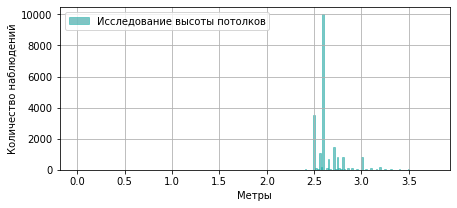

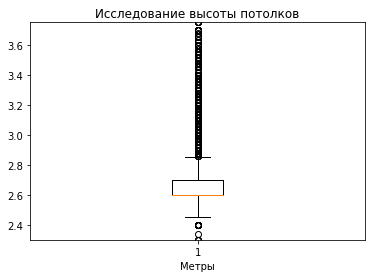

График зависимости за квадратный метр от Метры


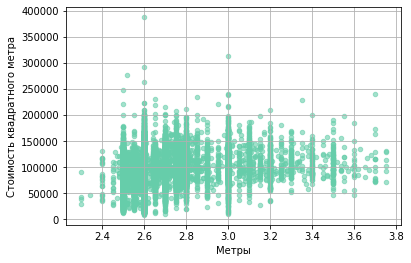

График зависимости общей стоимости объекта от Метры


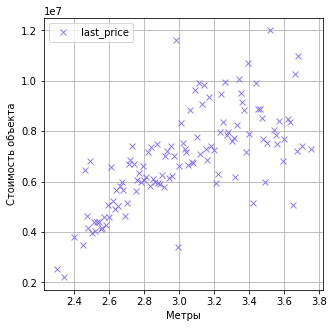

Общее описание данных в столбце
count    21285.000000
mean         2.649593
std          0.168884
min          2.300000
25%          2.600000
50%          2.600000
75%          2.700000
max          3.750000
Name: ceiling_height, dtype: float64

Коэффициент корреляции квадратного метра
0.21650965059170163

Коэффициент корреляции общей стоимости объекта
0.3778360645318837


In [42]:
analyze('ceiling_height','Исследование высоты потолков', 'Метры', 'Количество наблюдений')

##### Выводы по разделу

В основном, высота потолков лежит в пределах от 2.5 до 3.5 метров, при этом высокие потолки всё-таки влияют на стоимость объекта

In [43]:
#Код ревьюера
data['ceiling_height'].unique()

array([  2.7 ,   2.6 ,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

#### Этаж квартиры

Гистограмма


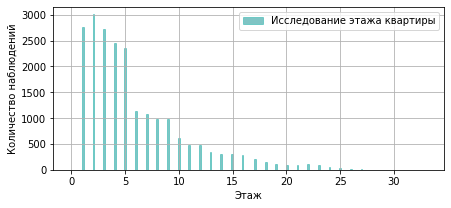

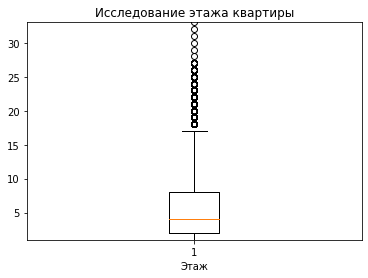

График зависимости за квадратный метр от Этаж


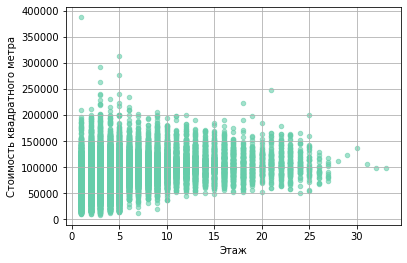

График зависимости общей стоимости объекта от Этаж


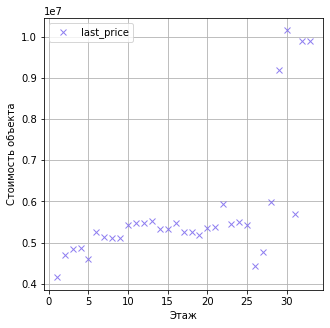

Общее описание данных в столбце
count    21285.000000
mean         5.859713
std          4.878745
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Коэффициент корреляции квадратного метра
0.24815782858572052

Коэффициент корреляции общей стоимости объекта
0.13680902728731797


In [44]:
analyze('floor','Исследование этажа квартиры', 'Этаж', 'Количество наблюдений')

##### Выводы по разделу

В основном, объекты продаются на 1-9 этажах, потом идёт резкий спад, при этом видно, что за этажи выше 25-го продавцы хотят получить много. Но в среднем, по коэффициенту, этаж на стоимость влияет не так значительно.

#### Тип этажа квартиры («первый», «последний», «другой»)
Где:
- первый - 1-ая категория

- последний - 2ая категория

- другой - 3я категория

Гистограмма


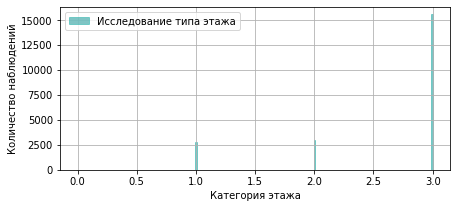

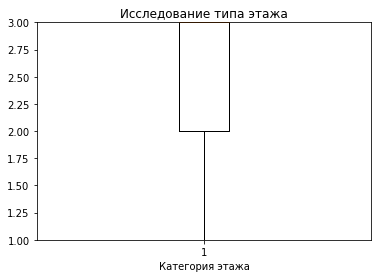

График зависимости за квадратный метр от Категория этажа


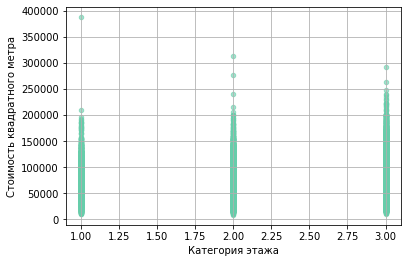

График зависимости общей стоимости объекта от Категория этажа


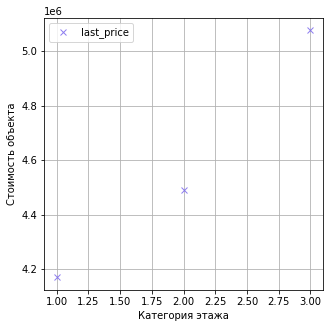

Общее описание данных в столбце
count    21285.000000
mean         2.601879
std          0.705455
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: floor_type, dtype: float64

Коэффициент корреляции квадратного метра
0.2200281086871756

Коэффициент корреляции общей стоимости объекта
0.1489533826902885


In [45]:
analyze('floor_type','Исследование типа этажа', 'Категория этажа', 'Количество наблюдений')

##### Выводы по разделу

В основном, продаются объекты с категорией этажа "другой", что логично, т.к. таких квартир, очевидно, больше. Категории "первый" и "последний" примерно равны, что также логично. На стоимость это влияет незначительно.

#### Общее количество этажей в доме

Гистограмма


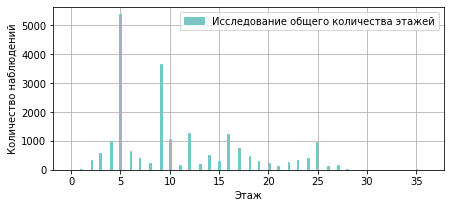

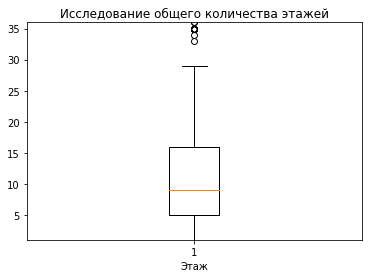

График зависимости за квадратный метр от Этаж


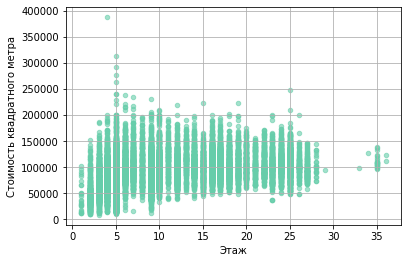

График зависимости общей стоимости объекта от Этаж


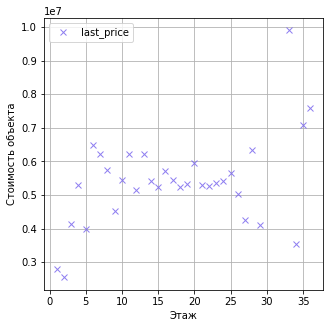

Общее описание данных в столбце
count    21285.000000
mean        10.725863
std          6.593413
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Коэффициент корреляции квадратного метра
0.3400379955025963

Коэффициент корреляции общей стоимости объекта
0.19909821374948683


In [46]:
analyze('floors_total','Исследование общего количества этажей', 'Этаж', 'Количество наблюдений')

##### Выводы по разделу

По общему количеству побеждают 5-ти и 9-ти этажные дома. Поэтому по стоимости ситуация странная - слишком разные категории по количеству

#### Расстояние до центра города в километрах

Гистограмма


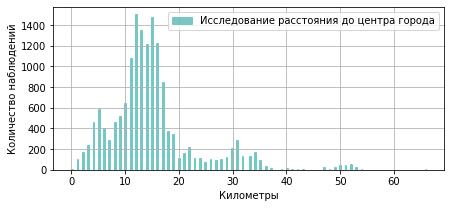

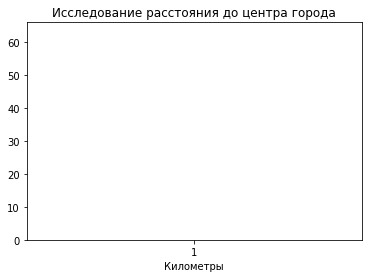

График зависимости за квадратный метр от Километры


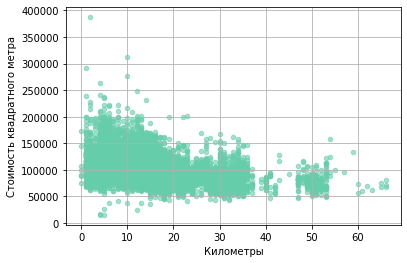

График зависимости общей стоимости объекта от Километры


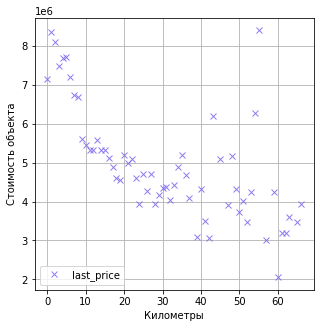

Общее описание данных в столбце
count    15924.000000
mean        14.978272
std          8.563759
min          0.000000
25%         11.000000
50%         14.000000
75%         17.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

Коэффициент корреляции квадратного метра
-0.3911647732830885

Коэффициент корреляции общей стоимости объекта
-0.3479586457497236


In [47]:
analyze('cityCenters_nearest','Исследование расстояния до центра города', 'Километры', 'Количество наблюдений')

##### Выводы по разделу

Как видно, прямо в центре объектов не так уж и много, чем дальше от центра, тем дешевле. Это соответствует реальности.

#### Расстояние до ближайшего аэропорта

Гистограмма


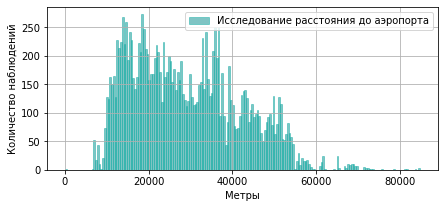

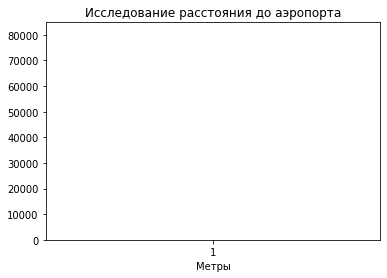

График зависимости за квадратный метр от Метры


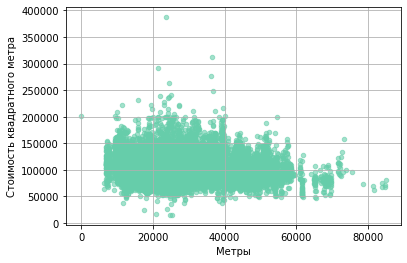

График зависимости общей стоимости объекта от Метры


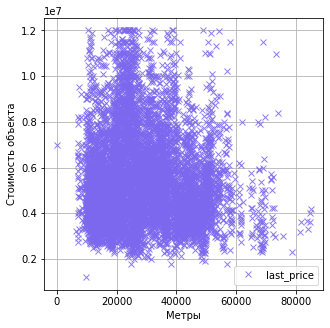

Общее описание данных в столбце
count    15912.000000
mean     28947.624749
std      12983.122157
min          0.000000
25%      18079.000000
50%      27125.500000
75%      37652.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Коэффициент корреляции квадратного метра
-0.03888922227696473

Коэффициент корреляции общей стоимости объекта
-0.04279175406330401


In [48]:
analyze('airports_nearest','Исследование расстояния до аэропорта', 'Метры', 'Количество наблюдений')

##### Выводы по разделу

Расположение аэропорта слабо влияет на стоимость, что логично, ведь аэропорты не строят в жилых массивах, есть определенные нормы. 

#### Расстояние до ближайшего парка

Гистограмма


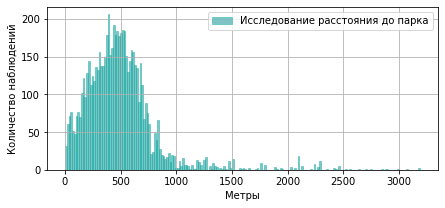

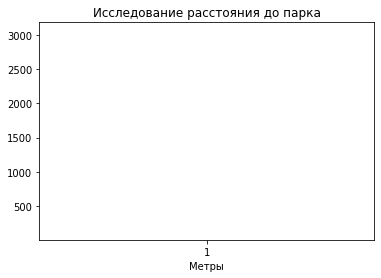

График зависимости за квадратный метр от Метры


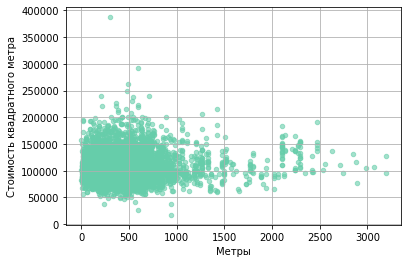

График зависимости общей стоимости объекта от Метры


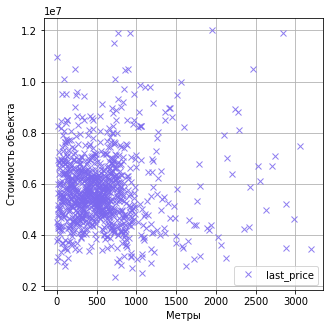

Общее описание данных в столбце
count    6652.000000
mean      489.091702
std       330.216448
min         1.000000
25%       289.000000
50%       455.500000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Коэффициент корреляции квадратного метра
0.0674735827254974

Коэффициент корреляции общей стоимости объекта
0.04471263951525377


In [49]:
analyze('parks_nearest','Исследование расстояния до парка', 'Метры', 'Количество наблюдений')

##### Выводы по разделу

В основном, парки расположены на расстоянии до 500 м, на стоимость это влияет слабо. 

#### День публикации объявления

Гистограмма


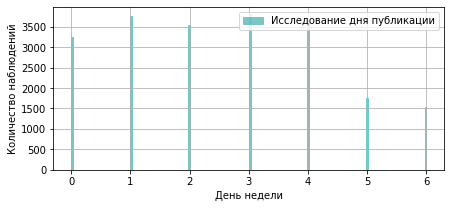

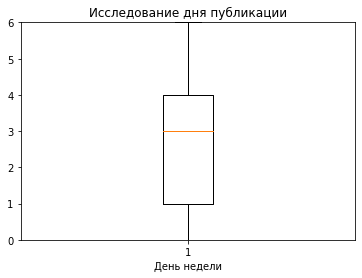

График зависимости за квадратный метр от День недели


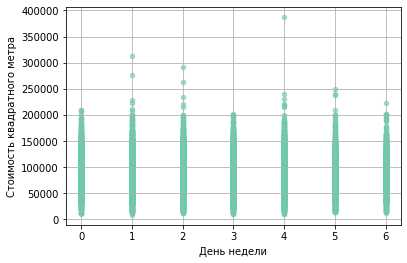

График зависимости общей стоимости объекта от День недели


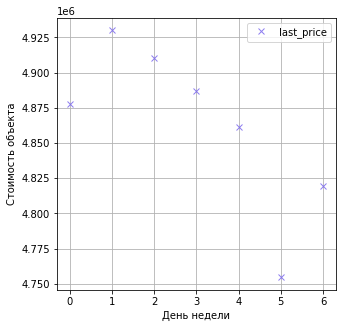

Общее описание данных в столбце
count    21285.000000
mean         2.572281
std          1.794875
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

Коэффициент корреляции квадратного метра
-0.009901429726746156

Коэффициент корреляции общей стоимости объекта
-0.014850526339412005


In [50]:
analyze('weekday_exposition','Исследование дня публикации', 'День недели', 'Количество наблюдений')

##### Выводы по разделу

Как видно, объявления, в основном, публикуются в рабочии дни, что логично, ведь обычно этим занимаются риэлторы. На стоимость объекта день размещения влияет слабо, но, как ни странно, объявления размещенные в пятницу и воскресенье, имеюют стоимость немного ниже.

#### Месяц публикации объявления

Гистограмма


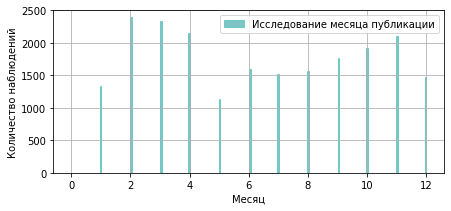

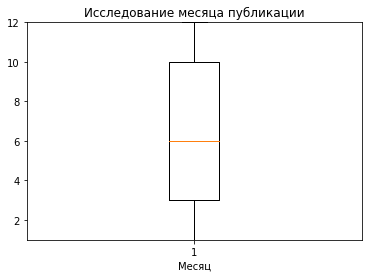

График зависимости за квадратный метр от Месяц


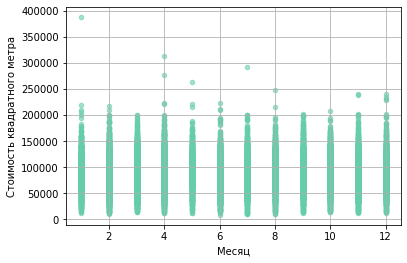

График зависимости общей стоимости объекта от Месяц


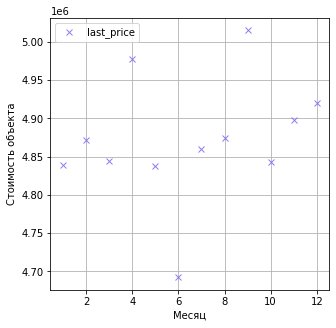

Общее описание данных в столбце
count    21285.000000
mean         6.393094
std          3.490907
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

Коэффициент корреляции квадратного метра
-0.0035551029287006716

Коэффициент корреляции общей стоимости объекта
0.007119916247466256


In [51]:
analyze('month_exposition','Исследование месяца публикации', 'Месяц', 'Количество наблюдений')

##### Выводы по разделу

Здесь мы видимо, что меньше всего предложений летом, а также в декабре и январе, что соответствует реальности. При этом цены выше всего в декабре и апреле, видимо, спрос в эти месяцы самый большой - успеть купить до нового года и до майских праздников.

#### Год публикации объявления

Гистограмма


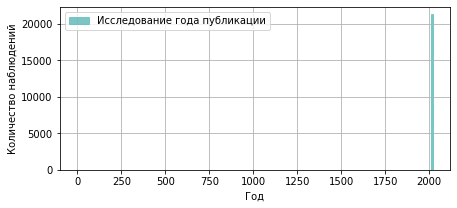

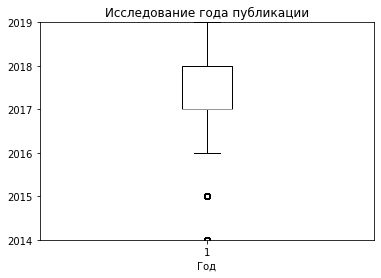

График зависимости за квадратный метр от Год


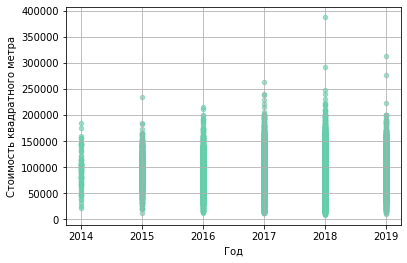

График зависимости общей стоимости объекта от Год


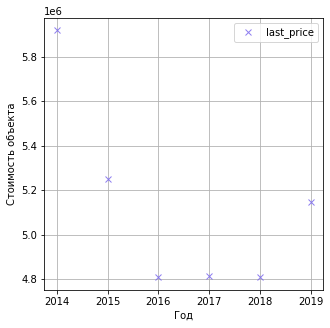

Общее описание данных в столбце
count    21285.000000
mean      2017.387315
std          1.021084
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exposition, dtype: float64

Коэффициент корреляции квадратного метра
0.07301712291877713

Коэффициент корреляции общей стоимости объекта
0.0002602939888049126


In [52]:
analyze('year_exposition','Исследование года публикации', 'Год', 'Количество наблюдений')

##### Выводы по разделу

Как видно, больше всего объявлений было в период с 2017 по 2018 год, но при этом стоимость квадратного метра всегда растёт, за исключением 2019 года, но, возможно, за этот год были неполные данные

<a id='Изменение аномальных и редких значений в датафрейме'></a>

#### Изменение аномальных и редких значений в датафрейме

По результатам исследования были выявлены аномальные и редкие значения в следующих столбцах:
- `ceiling_height`
- `last_price`
- `total_area`
- `rooms`
- `kitchen_area`
- `floors_total`

In [53]:
#Посмотрим, сколько записей осталось после предобработки
#столбец не имеет пропусков, поэтому в shape будет отображаться общее количество строк
data.shape[0]

23565

In [54]:
#Ограничим максимальную и минимальную стоимость квартиры
modified_data = data.query('(last_price <= @max_apart_price) and (last_price >= @min_apart_price)')
modified_data.shape[0]

21638

In [55]:
#ограничим жилую площадь
modified_data = modified_data.query('(total_area < 150) and (total_area > 10)')
modified_data.shape[0]

21616

In [56]:
#Ограничим высоту потолка от 2.3 до  4 м
modified_data = modified_data.query('(ceiling_height <= 4) and (ceiling_height >= 2.3)')  
modified_data.shape[0]

21550

In [57]:
#В рамках исследования, будем учитывать расстояние до аэропорта > 0
#modified_data = modified_data.query('(airports_nearest > 0)')
#modified_data.shape[0]

In [58]:
#В рамках исследования, будем учитывать количество комнат до 6
modified_data = modified_data.query('(rooms < 6) and (rooms > 0)')
modified_data.shape[0]

21344

In [59]:
#ограничим площадь кухни
modified_data = modified_data.query('(kitchen_area < 40)')
modified_data.shape[0]

21333

In [60]:
#ограничим количество этажей
modified_data = modified_data.query('(floors_total < 40)')
modified_data.shape[0]

21331

In [61]:
#выясним, сколько данных мы потеряли в %
data_lost = round(1 - modified_data.shape[0] / data.shape[0], 3)*100
data_lost

9.5

In [62]:
#Код ревьюера
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 1 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21331 non-null  int64         
 1   last_price            21331 non-null  float64       
 2   total_area            21331 non-null  float64       
 3   first_day_exposition  21331 non-null  datetime64[ns]
 4   rooms                 21331 non-null  int64         
 5   ceiling_height        21331 non-null  float64       
 6   floors_total          21331 non-null  float64       
 7   living_area           21331 non-null  float64       
 8   floor                 21331 non-null  int64         
 9   is_apartment          21331 non-null  bool          
 10  studio                21331 non-null  bool          
 11  open_plan             21331 non-null  bool          
 12  kitchen_area          21331 non-null  float64       
 13  balcony         

#### Выводы по главе 7

В данной главе мы провели исследование основных показателей. На основании исследования были сделаны следующие выводы:

**Общая площадь**
В основном, объекты имеют площадь от 25 до 80 квадратных метров. 
Как видно, чем больше общая площадь, тем выше стоимость, что логично.
Если смотреть на стоимость за квадратный метр, то ситуация противоположная - чем больше общая площадь, тем меньше придётся заплатить за квадратный метр.

**Жилая площадь**
Ситуация аналогична исследованию по общей площади

**Площадь кухни**

В основном, кухни имеют площадь от 5 до 15 квадратных метров, что соответствует реальности. 

По распределению видно, что ситуация аналогична исследованию общей площади, но коэффициент Пирсона говорит о том, что площадь кухни слабо влияет на стоимость за квадратный метр, но влияет на общую стоимость.

**Цена объекта**

В рамках исследования учитываем стоимость квартир от 50000 до 8 миллионов, как видно, в основном, стоимость объектов составляет от 3.5 до 5 миллионов, с пиком на 4.5 миллионах, далее количество объявлений идёт на спад.

Отмечается также, что общая стоимость влияет на стоимость квадратного метра.

**Количество комнат**

В основном продаются 1,2 и 3 комнатные объекты, при этом чем больше комнат, тем выше общая стоимость, но ниже стоимость за квадратный метр. Но для значений больше 5 довольно мало значений, поэтому показатели выглядят не очень адекватно, возможно, необходимо больше наблюдений. 

**Высота потолков**

В основном, высота потолков лежит в пределах от 2.5 до 3.5 метров, при этом высокие потолки всё-таки незначителньо, влияют на стоимость объекта

**Этаж квартиры**

В основном, объекты продаются на 1-9 этажах, потом идёт резкий спад, при этом видно, что за этажи выше 25-го продавцы хотят получить много. Но в среднем, по коэффициенту, этаж на стоимость влияет не так значительно.


**Тип этажа квартиры («первый», «последний», «другой»)**

В основном, продаются объекты с категорией этажа "другой", что логично, т.к. таких квартир, очевидно, больше. Категории "первый" и "последний" примерно равны, что также логично. На стоимость это влияет незначительно.

**Общее количество этажей в доме**

По общему количеству побеждают 5-ти и 9-ти этажные дома. Поэтому по стоимости ситуация странная - слишком разные категории по количеству

**Расстояние до центра города в метрах**

Как видно, прямо в центре объектов не так уж и много, чем дальше от центра, тем дешевле. Это соответствует реальности.

**Расстояние до ближайшего аэропорта**

Расположение аэропорта слабо влияет на стоимость, что логично, ведь аэропорты не строят в жилых массивах, есть определенные нормы. 

**Расстояние до ближайшего парка**

В основном, парки расположены на расстоянии до 500 м, на стоимость это влияет слабо.

**День публикации объявления**

Как видно, объявления, в основном, публикуются в рабочии дни, что логично, ведь обычно этим занимаются риэлторы. На стоимость объекта день размещения влияет слабо, но, как ни странно, объявления размещенные в пятницу и воскресенье, имеюют стоимость немного ниже.

**Месяц публикации объявления**

Здесь мы видимо, что меньше всего предложений летом, а также в декабре и январе, что соответствует реальности. При этом цены выше всего в декабре и апреле, видимо, спрос в эти месяцы самый большой - успеть купить до нового года и до майских праздников.

**Год публикации объявления**

Как видно, больше всего объявлений было в период с 2017 по 2018 год, но при этом стоимость квадратного метра всегда растёт, за исключением 2019 года, но, возможно, за этот год были неполные данные

### Изучите, как быстро продавались квартиры (столбец days_exposition).

Этот параметр показывает, сколько дней «висело» каждое объявление.

    - Постройте гистограмму.
    
    - Посчитайте среднее и медиану.
    
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

In [63]:
def analyze_days_exposition (column, name, x, y):
    
    #Функция преобразует данные: ограничивает стоимость объекта в соответствии с указанным
    #в переменной max_apart_price
    #Выводит гистограммы, диаграмму размаха, считает среднее и медиану

    
  
    print('Гистограмма и диаграмма размаха')
    modified_data.plot(
        y = column,
        kind = 'hist',
        bins = 300,
        grid=True,
        alpha=.5,
        color='red',
        ec='black',
        label = name,
        figsize = (15,7),
        range = (0,modified_data[column].max()))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    #Построим диаграмму размаха
    plt.boxplot(modified_data[column]) 
    plt.title(name)
    plt.xlabel(x)
    plt.ylim(modified_data[column].min(), modified_data[column].max()) 
    plt.show()
    
    print('Гистограмма диаграмма размаха с ограничением до 150 дней')
    modified_data.plot(
        y = column,
        kind = 'hist',
        bins = 300,
        grid=True,
        alpha=.5,
        color='blue',
        ec='black',
        label = name,
        figsize = (15,7),
        range = (0,150))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    #Построим диаграмму размаха
    plt.boxplot(modified_data[column]) 
    plt.title(name)
    plt.xlabel(x)
    plt.ylim(modified_data[column].min(), 150) 
    plt.show()
    
    print('Среднее значение:')
    print(modified_data[column].mean())
          
    print('Медианное значение:')
    print(modified_data[column].median())      

Гистограмма и диаграмма размаха


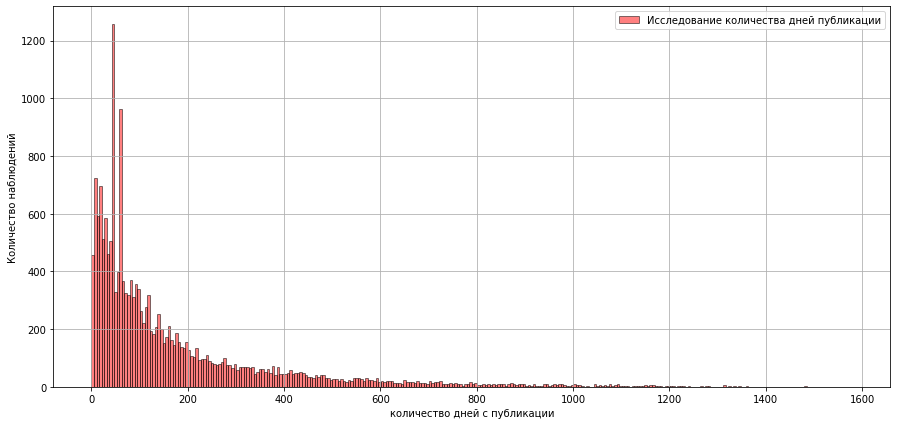

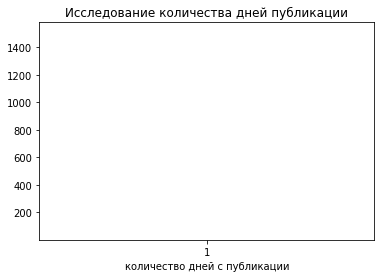

Гистограмма диаграмма размаха с ограничением до 150 дней


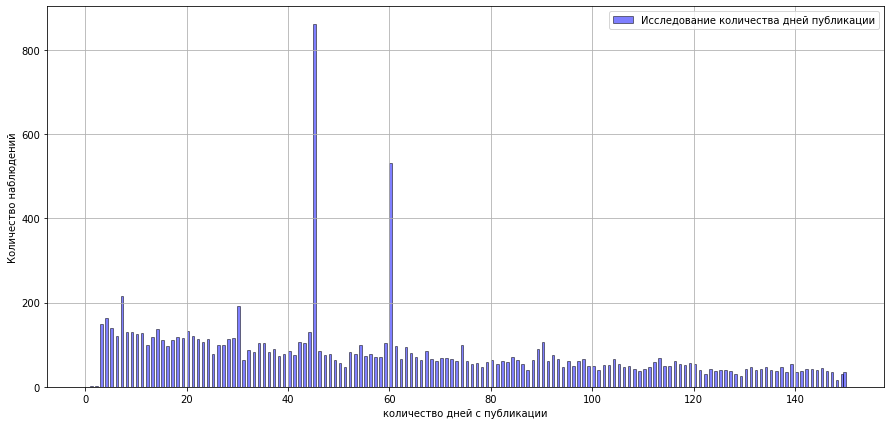

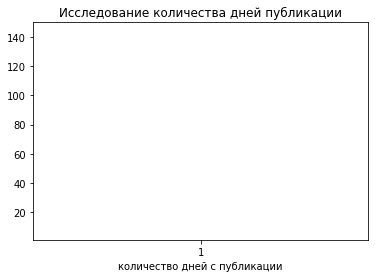

Среднее значение:
173.75817657118426
Медианное значение:
92.0


In [64]:
analyze_days_exposition('days_exposition','Исследование количества дней публикации', 'количество дней с публикации', 'Количество наблюдений')

### Выводы по главе 8

Исходя из расчетов и гистограмм, мы видим, что медианное значение составляет 70 дней, среднее значение 148 дней, но оно не совсем отражает реальность, так как некоторые объекты продавались несколько лет. Также имеется всплеск продаж за пару дней, но это кажется странным, возможно, данные учитывались некорректно.
Таким образом, мы можем считать что продажа меньше, чем за 70 дней - быстрая, а всё, что больше 150 дней - долгая продажа

In [65]:
#Код ревьюера
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

#### Исследуем зависимость стоимости от общей площади, жилой площади, площади кухни

In [66]:
def analyze_pivot_table (column):
    
    #Функция преобразует данные: ограничивает стоимость объекта в соответствии с указанным
    #в переменной max_apart_price
    #Выводит гистограммы, диаграмму размаха, считает среднее и медиану
    #а также убираем некоторые аномальные и редкие значения при помощи .query():
    #минимальную и максимальную стоимость объекта
    #минимальную и максимальную высоту потолка
    #составляет сводную таблицу по столбцу и строит матрицу диаграмм рассеяния

    
    modified_data_pivot = modified_data.pivot_table(index=column, 
                                            values=['total_area',
                                                  'living_area',
                                                  'kitchen_area',
                                                  'last_price'], aggfunc='median')
    print(modified_data_pivot.corr())
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(modified_data_pivot.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Зависимость стоимости от общей площади, жилой площади, площади кухни', fontdict={'fontsize':18}, pad=12); 


              kitchen_area  last_price  living_area  total_area
kitchen_area      1.000000    0.395153     0.052846    0.445790
last_price        0.395153    1.000000     0.110537    0.264417
living_area       0.052846    0.110537     1.000000    0.850349
total_area        0.445790    0.264417     0.850349    1.000000


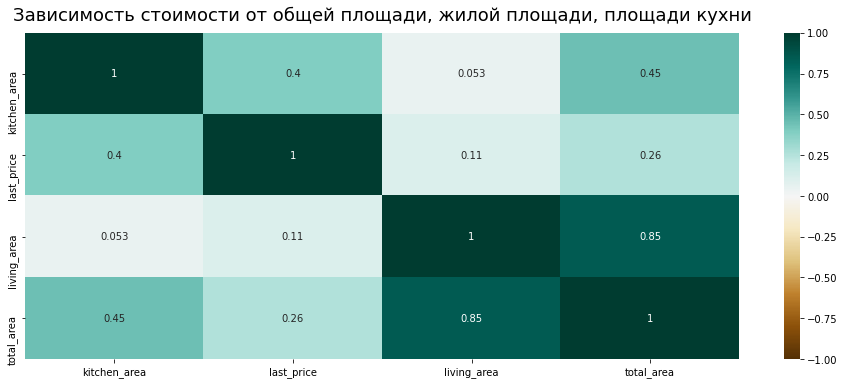

In [67]:
analyze_pivot_table ('locality_name')

#### Исследуем зависимость стоимости от количества комнат

In [68]:
def analyze_category (column, name, x):
    
    #функция выводит столбчатую диаграмму для 
    #анализа категориальных переменных с зависимостью от общей стоимости и стоимости квадратного метра
    print(name)
    
    
    print('\nЗависимость общей стоимости от', x)
    #вводим новую переменную со сводной таблицей
    p_t_rooms = modified_data.pivot_table(index = column, values = 'last_price', aggfunc = ['count', 'median'])
    p_t_rooms.columns = ['count', 'median']
    display(p_t_rooms.style.background_gradient('Blues').format('{:.1f}'))
    #выводим столбчатую диаграмму с общей стоимостью объекта
    p_t_rooms.plot(y = 'median',
               kind = 'bar',
               grid=True,
               color='Blue')

    plt.xlabel(x)
    plt.ylabel('Общая стоимость(медиана)')
    plt.figsize=(10,4)
    plt.show()
    #выводим таблицу

    
    print('Зависимость стоимости за квадратный метр от', x)
    #вводим новую переменную со сводной таблицей
    p_t_rooms = modified_data.pivot_table(index = column, values = 'sq_m_price', aggfunc = ['count', 'median'])
    p_t_rooms.columns = ['count', 'median']
    display(p_t_rooms.style.background_gradient('Reds').format('{:.1f}'))
    #выводим столбчатую диаграмму с общей стоимостью объекта
    p_t_rooms.plot(y = 'median',
               kind = 'bar',
               grid=True,
               color='Red')

    plt.xlabel(x)
    plt.ylabel('Стоимость за квадратный метр(медиана)')
    plt.figsize=(10,4)
    plt.show()



Анализ зависимости стоимости от общего количества комнат

Зависимость общей стоимости от количество комнат


,count,median
rooms,,
1,7942.0,3600000.0
2,7557.0,4680000.0
3,4952.0,5750000.0
4,762.0,6999000.0
5,118.0,8945000.0


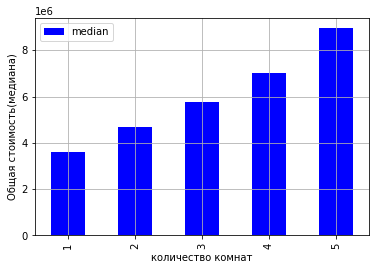

Зависимость стоимости за квадратный метр от количество комнат


,count,median
rooms,,
1,7942.0,100000.0
2,7557.0,91489.0
3,4952.0,85182.5
4,762.0,81921.5
5,118.0,77479.5


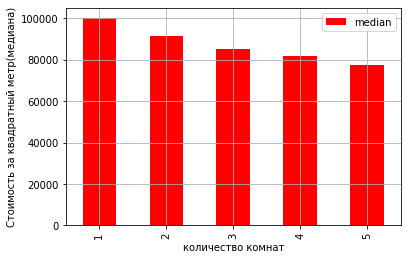

In [69]:
analyze_category ('rooms', 'Анализ зависимости стоимости от общего количества комнат', 'количество комнат')

##### Выводы по разделу
Как мы видим, стоимость в зависимости от количества комнат возрастает, но при этом стоимость за квадратный метр снижается

#### Исследуем зависимость стоимости типа этажа, на котором расположена квартира (первый, последний, другой)

Анализ зависимости стоимости от типа этажа, на котором расположена квартира (первый, последний, другой)

Зависимость общей стоимости от тип этажа


,count,median
floor_type,,
1,2755.0,3850000.0
2,2995.0,4000000.0
3,15581.0,4600000.0


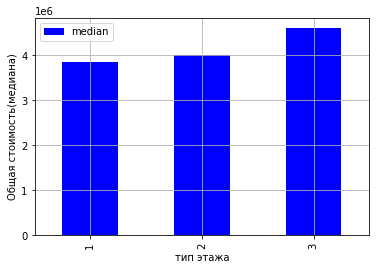

Зависимость стоимости за квадратный метр от тип этажа


,count,median
floor_type,,
1,2755.0,80435.0
2,2995.0,84323.0
3,15581.0,95890.0


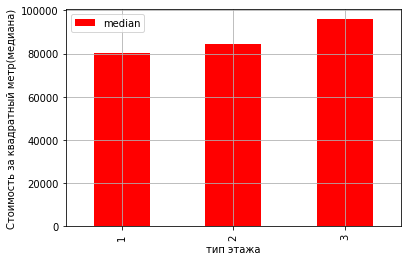

In [70]:
analyze_category ('floor_type', 
                  'Анализ зависимости стоимости от типа этажа, на котором расположена квартира (первый, последний, другой)',
                  'тип этажа')

##### Выводы по разделу
Как видно, стоимость квартиры на первом и последнем этаже несколько ниже, чем на остальных, но это может быть связано также с тем, что предложений по другим этажам значительно больше

#### Исследуем зависимость стоимости даты размещения (день недели)

Анализ зависимости стоимости от даты размещения (день недели)

Зависимость общей стоимости от день недели


,count,median
weekday_exposition,,
0,3263.0,4450000.0
1,3772.0,4500000.0
2,3563.0,4500000.0
3,3812.0,4400000.0
4,3618.0,4400000.0
5,1757.0,4400000.0
6,1546.0,4400000.0


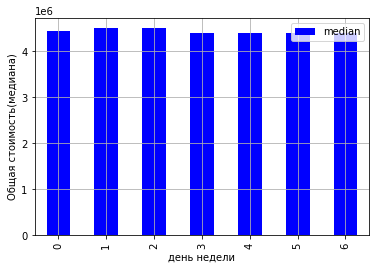

Зависимость стоимости за квадратный метр от день недели


,count,median
weekday_exposition,,
0,3263.0,92373.0
1,3772.0,93182.0
2,3563.0,93243.0
3,3812.0,92624.0
4,3618.0,92193.5
5,1757.0,91111.0
6,1546.0,92363.5


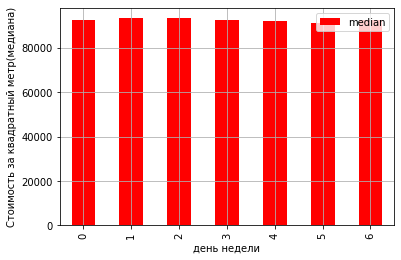

In [71]:
analyze_category ('weekday_exposition', 
                  'Анализ зависимости стоимости от даты размещения (день недели)',
                  'день недели')

##### Выводы по разделу
Как видно, стоимость квартиры практически не зависит от дня размещения объявления

#### Исследуем зависимость стоимости даты размещения (месяц)

Анализ зависимости стоимости от даты размещения (месяц)

Зависимость общей стоимости от Месяц


,count,median
month_exposition,,
1,1339.0,4400000.0
2,2394.0,4450000.0
3,2336.0,4494500.0
4,2151.0,4600000.0
5,1142.0,4350000.0
6,1598.0,4200000.0
7,1515.0,4399000.0
8,1567.0,4400000.0
9,1773.0,4500000.0


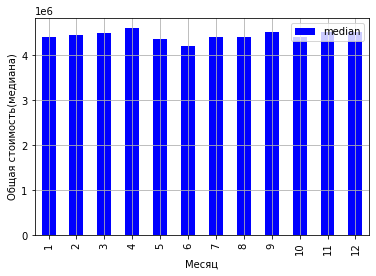

Зависимость стоимости за квадратный метр от Месяц


,count,median
month_exposition,,
1,1339.0,92593.0
2,2394.0,92880.0
3,2336.0,92792.5
4,2151.0,94118.0
5,1142.0,90862.5
6,1598.0,90391.0
7,1515.0,92559.0
8,1567.0,94000.0
9,1773.0,93301.0


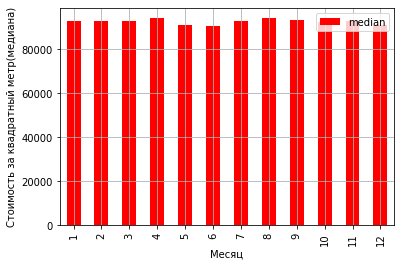

In [72]:
analyze_category ('month_exposition', 
                  'Анализ зависимости стоимости от даты размещения (месяц)',
                  'Месяц')

##### Выводы по разделу
Как видно, меньше всего предложений в декабре, январе и мае, при этом дороже всего квартиры стоят в декабре и апреле. Наименьшая стоимость квартир в летние месяце.

##### Выводы по разделу
Как видно, стоимость квартиры практически не зависит от дня размещения объявления

#### Исследуем зависимость стоимости даты размещения (год)

Анализ зависимости стоимости от даты размещения (год)

Зависимость общей стоимости от Год


,count,median
year_exposition,,
2014,91.0,5500000.0
2015,991.0,4900000.0
2016,2480.0,4300000.0
2017,7372.0,4300000.0
2018,7802.0,4400000.0
2019,2595.0,4850000.0


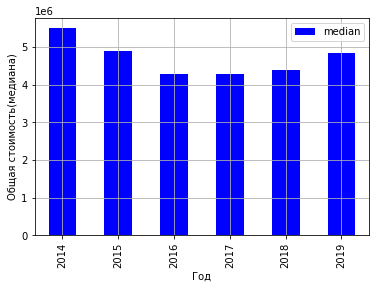

Зависимость стоимости за квадратный метр от Год


,count,median
year_exposition,,
2014,91.0,94667.0
2015,991.0,89600.0
2016,2480.0,89304.5
2017,7372.0,90023.5
2018,7802.0,93790.5
2019,2595.0,101087.0


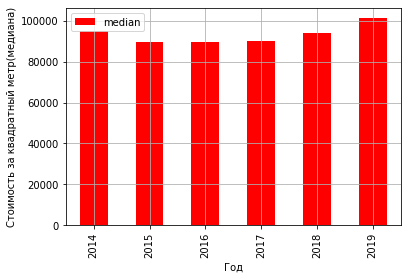

In [73]:
analyze_category ('year_exposition', 
                  'Анализ зависимости стоимости от даты размещения (год)',
                  'Год')

##### Выводы по разделу
Как видно, наименьшая стоимость была в период с 2016 по 2017 год, потом стоимость начала стремительно увеличиваться

### Выводы по главе 10

Как видно по коэффициентам корреляции, наибольшее влияние на стоимость оказывают показатели, связанные с общей площадью объекта (общая площадь, площадь кухни, жилая площадь, количество комнат), потом идут показатели, связанные со спросом/предложением (месяц и год размещения), наименьшее из рассмотренных показателей влияние оказывает тип этажа (первый, последний, другой)

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Эти данные можно найти по имени в столбце `locality_name`

In [74]:
#выделим топ 10 населенных пунктов по количеству объявлений
top_ten_sq_m_price = modified_data.pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count', 'median'])
top_ten_sq_m_price.columns = ['Число объявлений', 'Медианная  стоимость за кв. м.']
top_ten_sq_m_price_sorted = top_ten_sq_m_price.sort_values('Число объявлений', ascending=False)
top_ten_sq_m_price_sorted.head(10)

,Число объявлений,Медианная стоимость за кв. м.
locality_name,,
Санкт-Петербург,13611,101911.0
посёлок Мурино,524,84330.5
посёлок Шушары,434,76748.0
Всеволожск,388,65789.0
Колпино,336,74690.0
Пушкин,336,98455.0
посёлок Парголово,322,91984.5
Гатчина,304,67746.5
деревня Кудрово,282,91618.5


Диаграмма общего количества объявлений по населённым пунктам


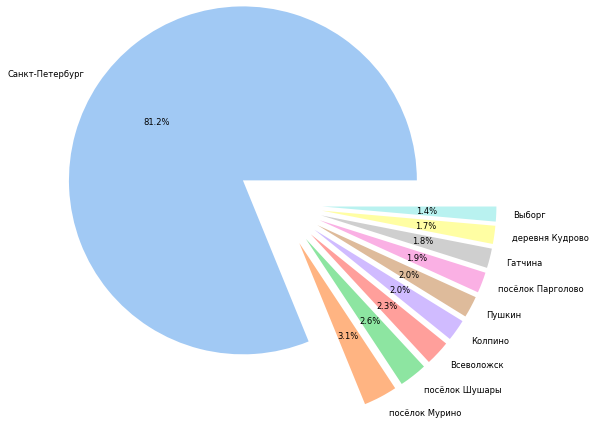

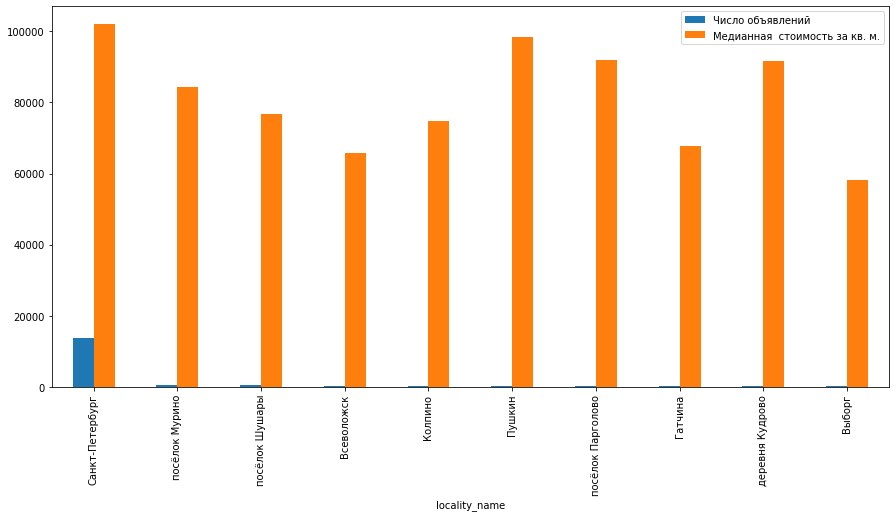

In [75]:
print ('Диаграмма общего количества объявлений по населённым пунктам')
# значения для "раздвижения диаграммы"
explode = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] 
  
# выводим диаграмму круговую
plt.pie(top_ten_sq_m_price_sorted['Число объявлений'].head(10),
        labels = top_ten_sq_m_price_sorted.head(10).index,
        colors=sns.color_palette('pastel'),
        radius=2,
        autopct='%.1f%%',
        textprops={'size': 'smaller'},
        explode=explode) 
plt.show() 

#выводим столбчатую диаграмму с общей стоимостью объекта
top_ten_sq_m_price_sorted.head(10).plot(kind='bar',figsize = (15,7))
plt.show() 

In [76]:
#выделим самую высокую и самую низкую стоимость за кв. метр из всей выборки
filtered_data = modified_data.groupby(by=['locality_name'])['sq_m_price'].mean().sort_values(ascending=False)

In [77]:
filtered_data

locality_name
Санкт-Петербург          105565.624715
Зеленогорск              102890.380952
посёлок Лисий Нос        100661.000000
Пушкин                   100427.306548
Кудрово                   99494.286585
                             ...      
посёлок Совхозный         12629.500000
деревня Выскатка          12335.500000
деревня Вахнова Кара      11688.000000
посёлок станции Свирь     11481.500000
деревня Старополье        11206.333333
Name: sq_m_price, Length: 329, dtype: float64

График изменения средней стоимости кв. метра от Санкт-Петербурга к окраинам


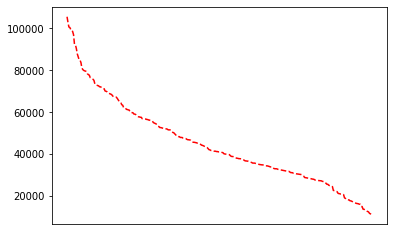

In [78]:
print('График изменения средней стоимости кв. метра от Санкт-Петербурга к окраинам')
plt.plot(filtered_data, 'r--')
plt.xticks([])
plt.show() 

### Выводы по главе 12

Как видно, самое больше количество объявлений в Санкт-Петербурге, но при этом цена за квадратный метр выше всего в Зеленогорске, а самая низкая цена - в деревне Старополье, а если рассматривать из топ-10 по количеству объявлений - в Выборге

### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра.

Опишите, как стоимость объектов зависит от расстояния до центра города.

In [79]:
def analyze_city_center (column, city_name, name, x, y):
    
    #Функция преобразует данные: ограничивает стоимость объекта в соответствии с указанным
    #в переменной max_apart_price
    #Выводит гистограммы, диаграмму размаха, считает среднее и медиану
   
       
    #выведем гистограмму
    print('Гистограмма')
    modified_data.plot(
        y = column,
        kind = 'hist',
        bins = 200,
        grid=True,
        alpha=.8,
        color='Silver',
        ec='Yellow',
        label = name,
        figsize = (15,5),
        range = (0,modified_data[column].max()))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
    #График зависимости стоимости квадратного метра от значения column
    print('График зависимости за квадратный метр от', x)
    modified_data.plot(
        x=column,
        y='sq_m_price',
        kind='scatter',
        grid=True, 
        alpha=0.6,
        color='MediumAquamarine')
    plt.xlabel(x)
    plt.ylabel('Стоимость квадратного метра')
    plt.show()
    
    #для анализа стоимости объекта не используется
    if column != 'last_price':
    #График зависимости общей стоимости от значения column
    #Данный график построен другим способом, при помощи pivot_table
        print('График зависимости общей стоимости объекта от', x)
        modified_data.pivot_table(index=column, values='last_price').plot(
            grid=True, 
            style='x', 
            figsize=(5, 5),
            alpha=0.85,
            color='MediumSlateBlue'
            )
        plt.xlabel(x)
        plt.ylabel('Стоимость объекта')
        plt.show()
    
    #Описание данных в столбце
    print('Общее описание данных в столбце')
    print(modified_data[column].describe())
    
    print('\nКоэффициент корреляции квадратного метра')
    print(modified_data['sq_m_price'].corr(modified_data[column]))
    print('\nКоэффициент корреляции общей стоимости объекта')
    print(modified_data['last_price'].corr(modified_data[column]))
    
    print('Сводная таблица')
    modified_data_km_price_calc = modified_data.pivot_table(index = column, values=['last_price','sq_m_price'],aggfunc='mean')
    modified_data_km_price_calc.columns = ['Общая стоимость', 'Цена за кв. м.']
    print(modified_data_km_price_calc.sort_values(column, ascending=True).head(30))

Гистограмма


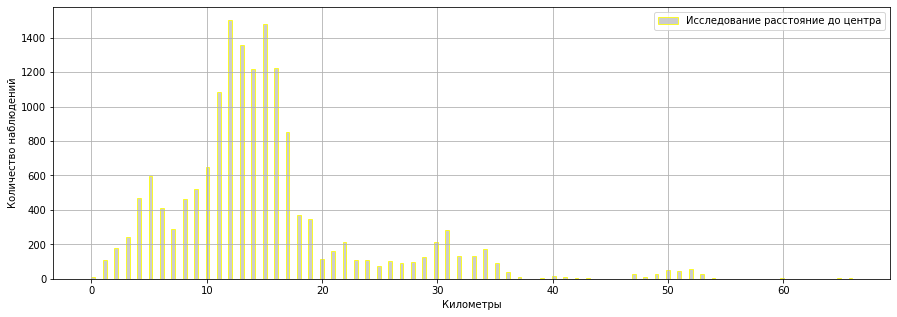

График зависимости за квадратный метр от Километры


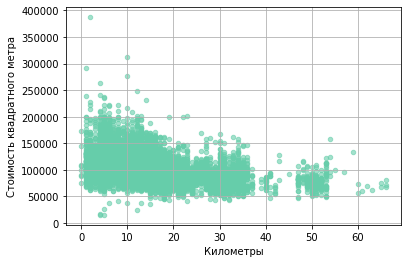

График зависимости общей стоимости объекта от Километры


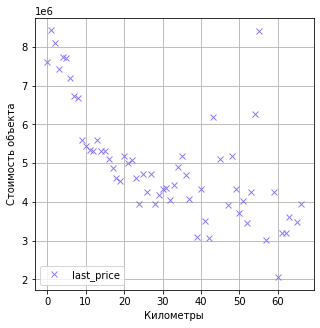

Общее описание данных в столбце
count    15965.000000
mean        14.956655
std          8.574252
min          0.000000
25%         11.000000
50%         14.000000
75%         17.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

Коэффициент корреляции квадратного метра
-0.39128709631700714

Коэффициент корреляции общей стоимости объекта
-0.350383966111026
Сводная таблица
                     Общая стоимость  Цена за кв. м.
cityCenters_nearest                                 
0.0                     7.622500e+06   111238.500000
1.0                     8.427991e+06   120011.212963
2.0                     8.097326e+06   115921.404494
3.0                     7.439476e+06   109314.787755
4.0                     7.732713e+06   114549.753747
5.0                     7.723188e+06   120128.381513
6.0                     7.206082e+06   121848.090024
7.0                     6.733062e+06   116989.649306
8.0                     6.694136e+06   115904.688312
9.0                  

In [80]:
analyze_city_center ('cityCenters_nearest', 'Санкт-Петербург', 'Исследование расстояние до центра', 'Километры', 'Количество наблюдений')

### Выводы по главе 14

Как видно по полученным данным, дома находятся на удалении до 17 км от центра, далее количество значительно снижается. Центром, исходя из стоимости, можно назвать расстояние до 5 км, далее цена снижается. 

В рамках этих 5 км цена варьируется (возможно, это зависит от расположения "точек интереса" - каких-либо значимых объектов), но в целом, каждый километр стоит 200-500 тысяч. 

### Общий вывод

Была осуществлено предварительное исследование данных, в качестве рекомендаций заказчику о дополнительных показателей можно предоставить следующую информацию о собираемых данных:

**Модификация имеющихся данных:**
- ponds_around3000 — число водоёмов в радиусе 3 км, ponds_nearest — расстояние до ближайшего водоёма (м) => разделить на водоёмы и водотоки (реки)

**Добавление новых данных:**

**Картографические данные:**
- расстояние до ближайшего детского садика;
- расстояние до ближайшей школы;
- расстояние до ближайшего торгового центра;
- расстояние до ближайшей остановки метро (если метро отсутствует в населённом пункте, обозначить специальным образом);
- расстояние до ближайшей остановки другого общественного транспорта (автобус, трамвай, маршрутное такси);
- расстояние до ближайшей детской поликлинники;
- расстояние до ближайшей взрослой поликлинники;
- расстояние до ближайшего крупного университета;
- наличие в радиусе 15 км крупных производственных предприятий.

**Данные от пользователей:**
- оставляет ли собственник мебель и бытовую технику покупателю
- наличие мусоропровода;
- наличие лифта;
- наличие домофона;
- наличие консьержа;
- наличие закрытого двора.
- количество этажей в квартире/апартаментах

**Данные из реестра недвижимости:**
- Количество собственников;
- Имеются ли несовершеннолетние собственники;
- Возраст объекта недвижимости;
- Является ли объект недвижимости новостройкой или это вторичное жильё.

**Данные из других служб:**
- Имеется ли значительная задолженность по коммунальным платежам;
- Не арестовано ли имущество.

**Данные по объявлению**
- Объект недвижимости продаётся напрямую от собственника или от агенства недвижимости
- Количество фото во объявлении
- Наличие текстового описания в объявлении с количеством более 20-ти слов.

Дополнительные данные помогут выявить новые зависимости в исследовании, получить более точный результат.

Также были выявлены пропуски в данных. В некоторых случаях они были значительными, они могли повлиять на результат исследования. Появление таких пропусков можно разделить на категории:
1) Человеческий фактор (непредумышленный пропуск в заполнении данных, невозможность предоставления информации и др.)
2) Технические сбои (ошибки разработчиков, сбой при переносе данных)


По вопросам добавления новых данных следует дополнительно проконсультироваться с экспертами в сфере недвижимости.

**Целью исследования** было выявление зависимостей между стоимостью недвижимости и следующими параметрами, а также их общее описание:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
  
Благодаря проведения исследования было выявлено:

**Общая площадь**
В основном, объекты имеют площадь от 25 до 80 квадратных метров. 
Как видно, чем больше общая площадь, тем выше стоимость, что логично.
Если смотреть на стоимость за квадратный метр, то ситуация противоположная - чем больше общая площадь, тем меньше придётся заплатить за квадратный метр.

**Жилая площадь**
Ситуация аналогична исследованию по общей площади

**Площадь кухни**

В основном, кухни имеют площадь от 5 до 15 квадратных метров, что соответствует реальности. 

По распределению видно, что ситуация аналогична исследованию общей площади, но коэффициент Пирсона говорит о том, что площадь кухни слабо влияет на стоимость за квадратный метр, но влияет на общую стоимость.

**Цена объекта**

В рамках исследования учитываем стоимость квартир от 50000 до 8 миллионов, как видно, в основном, стоимость объектов составляет от 3.5 до 5 миллионов, с пиком на 4.5 миллионах, далее количество объявлений идёт на спад.

Отмечается также, что общая стоимость влияет на стоимость квадратного метра.

**Количество комнат**

В основном продаются 1,2 и 3 комнатные объекты, при этом чем больше комнат, тем выше общая стоимость, но ниже стоимость за квадратный метр. Но для значений больше 5 довольно мало значений, поэтому показатели выглядят не очень адекватно, возможно, необходимо больше наблюдений. 

**Высота потолков**

В основном, высота потолков лежит в пределах от 2.5 до 3.5 метров, при этом высокие потолки всё-таки незначителньо, влияют на стоимость объекта

**Этаж квартиры**

В основном, объекты продаются на 1-9 этажах, потом идёт резкий спад, при этом видно, что за этажи выше 25-го продавцы хотят получить много. Но в среднем, по коэффициенту, этаж на стоимость влияет не так значительно.


**Тип этажа квартиры («первый», «последний», «другой»)**

В основном, продаются объекты с категорией этажа "другой", что логично, т.к. таких квартир, очевидно, больше. Категории "первый" и "последний" примерно равны, что также логично. На стоимость это влияет незначительно.

**Общее количество этажей в доме**

По общему количеству побеждают 5-ти и 9-ти этажные дома. Поэтому по стоимости ситуация странная - слишком разные категории по количеству

**Расстояние до центра города в метрах**

Как видно, прямо в центре объектов не так уж и много, чем дальше от центра, тем дешевле. Это соответствует реальности.

**Расстояние до ближайшего аэропорта**

Расположение аэропорта слабо влияет на стоимость, что логично, ведь аэропорты не строят в жилых массивах, есть определенные нормы. 

**Расстояние до ближайшего парка**

В основном, парки расположены на расстоянии до 500 м, на стоимость это влияет слабо.

**День публикации объявления**

Как видно, объявления, в основном, публикуются в рабочии дни, что логично, ведь обычно этим занимаются риэлторы. На стоимость объекта день размещения влияет слабо, но, как ни странно, объявления размещенные в пятницу и воскресенье, имеюют стоимость немного ниже.

**Месяц публикации объявления**

Здесь мы видимо, что меньше всего предложений летом, а также в декабре и январе, что соответствует реальности. При этом цены выше всего в декабре и апреле, видимо, спрос в эти месяцы самый большой - успеть купить до нового года и до майских праздников.

**Год публикации объявления**

Как видно, больше всего объявлений было в период с 2017 по 2018 год, но при этом стоимость квадратного метра всегда растёт, за исключением 2019 года, но, возможно, за этот год были неполные данные

Таким образом, наименьшей стоимостью обладает объект недвижимости с маленькой площадью, количеством комнат, с объявлением, размещенным летом 2017-2018гг, как можно дальше от центра.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод